<center><h1>Fundamentos Data Science parte 2</h1><center>
    Autor: Walther Becks

# Desafío 2: Rendimiento escolar

Lo contactan de una escuela Portuguesa para generar **un modelo que identifique aquellos
alumnos** que presentan un bajo desempeño académico, **medido en el promedio final del año
escolar**. Para ello le envían un archivo con registros sociodemográficos y conductuales de
los alumnos de dos escuelas **para perfilar a los estudiantes**.
De manera adicional la psicopedagoga sugiere inspeccionar una batería de preguntas
asociadas a aspectos ambientales del alumno (de famrel a health) y ver si éstas se
pueden **abstraer en categorías latentes.**

**Datos Asociados: students.csv**

## Hito 1: Análisis preliminar

1. Se nos pide desarrollar uno modelo predictivo a partir de las notas finales del alumno (G3) para identificar aquellos alumnos con bajo desempeño académico. Junto a eso, nos solicitan la modelación de 3 modelos descriptivos (G1, G2, G3), es por esto que como primer paso debemos validar los 3 primeros desde la econometría y uno desde el ML.

2. Estamos frente a un problema de **Regresión** ya que los **vectores objetivo** son de naturaleza numérica.

**Librerías a utilizar:** 

1. pandas == 1.2.0
2. numpy == 1.20.3
3. scipy == 1.7.3  
4. matplotlib == 3.0.3
5. seaborn == 0.11.2 
6. statsmodels == 0.13.2
7. conda == 4.8.3
8. python == 3.7.3
9. missingno == 0.5.1

-------------

## Hito 2

### Importe de librerias

In [171]:
import pandas as pd # Librería de manipulación de datos
import numpy as np # Librería de manipulación de datos
import matplotlib.pyplot as plt # Librería de visualización de datos y gráficos
import seaborn as sns # Librería de visualización de datos y gráficos
sns.set_style('darkgrid') # Parte de la librería de seaborn, que permite un estilo distinto al default en visualización
import missingno # Librería de visualización de falta de datos para análisis exploratorio
import warnings # Librería para ignorar las advertencias que arroja Python por cambio de versiones y ver un código más claro
warnings.filterwarnings('ignore') # Importe de la opción de ignorar las advertencias.

# Clasificación desde la Econometría
import statsmodels.api as sm # Librería que permite funciones y clases para la estimación de múltiples modelos estadísticos, como también pruebas estadisticas y exploración estadística.
import statsmodels.formula.api as smf # Librería que permite la creación del modelo en base a una formula y Data Frame.
# Clasificación desde el Machine Learning
from sklearn.linear_model import LogisticRegression # Importe de librería de herramientas de predicción de análisis de datos para modelos lineales y regresión logística
from sklearn.linear_model import LinearRegression # Importe de librería de herramientas de predicción de análisis de datos para modelos lineales y regresión logística
from sklearn.model_selection import train_test_split # Librería para dividir la muestra entre entrenamiento y prueba
from sklearn.metrics import mean_squared_error, r2_score # Librería que importa herramientas de análisis de error cuadratico y error cuadratico medio
from sklearn.preprocessing import StandardScaler # Librería de estandarización de variables de muestras de prueba y entrenamiento usado para Machine Learning
from sklearn.metrics import classification_report, roc_curve, confusion_matrix,accuracy_score,recall_score,precision_score,roc_auc_score # Librerías de Machine Learning utilizadas para medir la efectividad de los modelos.

import functions # Funciones creadas ad-hoc para la realización de este examen. 
plt.style.use('seaborn') # Gráficos estilo seaborn
plt.rcParams['figure.figsize'] = (10,6) # Ampliar las figuras gráficas
plt.rcParams["figure.dpi"] = 200 # Mejora de calidad de los gráficos
pd.set_option('display.max_rows', None) # Opción que permite ver todas las filas al cargar un Data Frame
pd.set_option('display.max_columns', None) # Opción que permite ver todas las columnas de un Data Frame

### Importe de datos

In [41]:
df = pd.read_csv('students.csv', sep = '|', encoding = 'latin1')
df = df.replace(['nulidade', 'sem validade', 'zero'], np.nan).drop('Unnamed: 0', axis = 1)
print(f"Contamos con {df.shape[0]} filas y {df.shape[1]} columnas")
df.head()

Contamos con 395 filas y 33 columnas


school sex   age address famsize Pstatus Medu Fedu     Mjob      Fjob  \
0     GP   F   NaN       U     GT3       A    4    4  at_home   teacher   
1     GP   F  "17"       U     GT3       T    1    1  at_home     other   
2     GP   F  "15"       U     LE3       T    1    1  at_home     other   
3     GP   F  "15"       U     GT3       T    4    2   health  services   
4     GP   F   NaN       U     GT3       T    3    3    other     other   

   reason guardian traveltime studytime failures schoolsup famsup paid  \
0  course   mother          2         2        0       yes     no   no   
1  course   father          1         2        0        no    yes   no   
2   other   mother          1         2        3       yes     no  yes   
3    home   mother          1         3        0        no    yes  yes   
4    home   father          1         2        0        no    yes  yes   

  activities nursery higher internet romantic famrel freetime goout Dalc Walc  \
0         no     yes    yes       no       no      4        3   "4"    1    1   
1         no      no    yes      yes       no      5        3   "3"    1    1   
2         no     yes    yes      yes       no      4        3   "2"    2    3   
3        yes     yes    yes      yes      yes      3        2   "2"    1    1   
4         no     yes    yes       no       no      4        3   "2"    1    2   

  health absences   G1  G2  G3  
0    "3"        6    5   6   6  
1    "3"        4    5   5   6  
2    "3"       10  NaN   8  10  
3    "5"        2   15  14  15  
4    "5"        4    6  10  10

### Limpieza de base de datos

#### Valores nulos

In [42]:
df = df.replace(to_replace='?',value= np.nan)
df.apply(lambda x: f"{round((x[x.isna()].shape[0]/x.shape[0])*100, 2)}%").sort_values(ascending = False).to_frame().rename(columns = {0:'% nulos'})

% nulos
schoolsup    2.03%
Pstatus      1.52%
higher       1.52%
nursery      1.52%
Mjob         1.52%
school       1.27%
studytime    1.27%
Walc         1.27%
goout        1.27%
famrel       1.27%
activities   1.27%
failures     1.27%
famsup       1.27%
Fedu         1.27%
famsize      1.01%
guardian     1.01%
reason       1.01%
G1           1.01%
absences     1.01%
health       1.01%
age          1.01%
Dalc         0.76%
traveltime   0.76%
internet     0.76%
Medu         0.76%
sex          0.76%
G3           0.76%
romantic     0.51%
freetime     0.51%
address      0.51%
paid         0.25%
Fjob          0.0%
G2            0.0%

<AxesSubplot:>

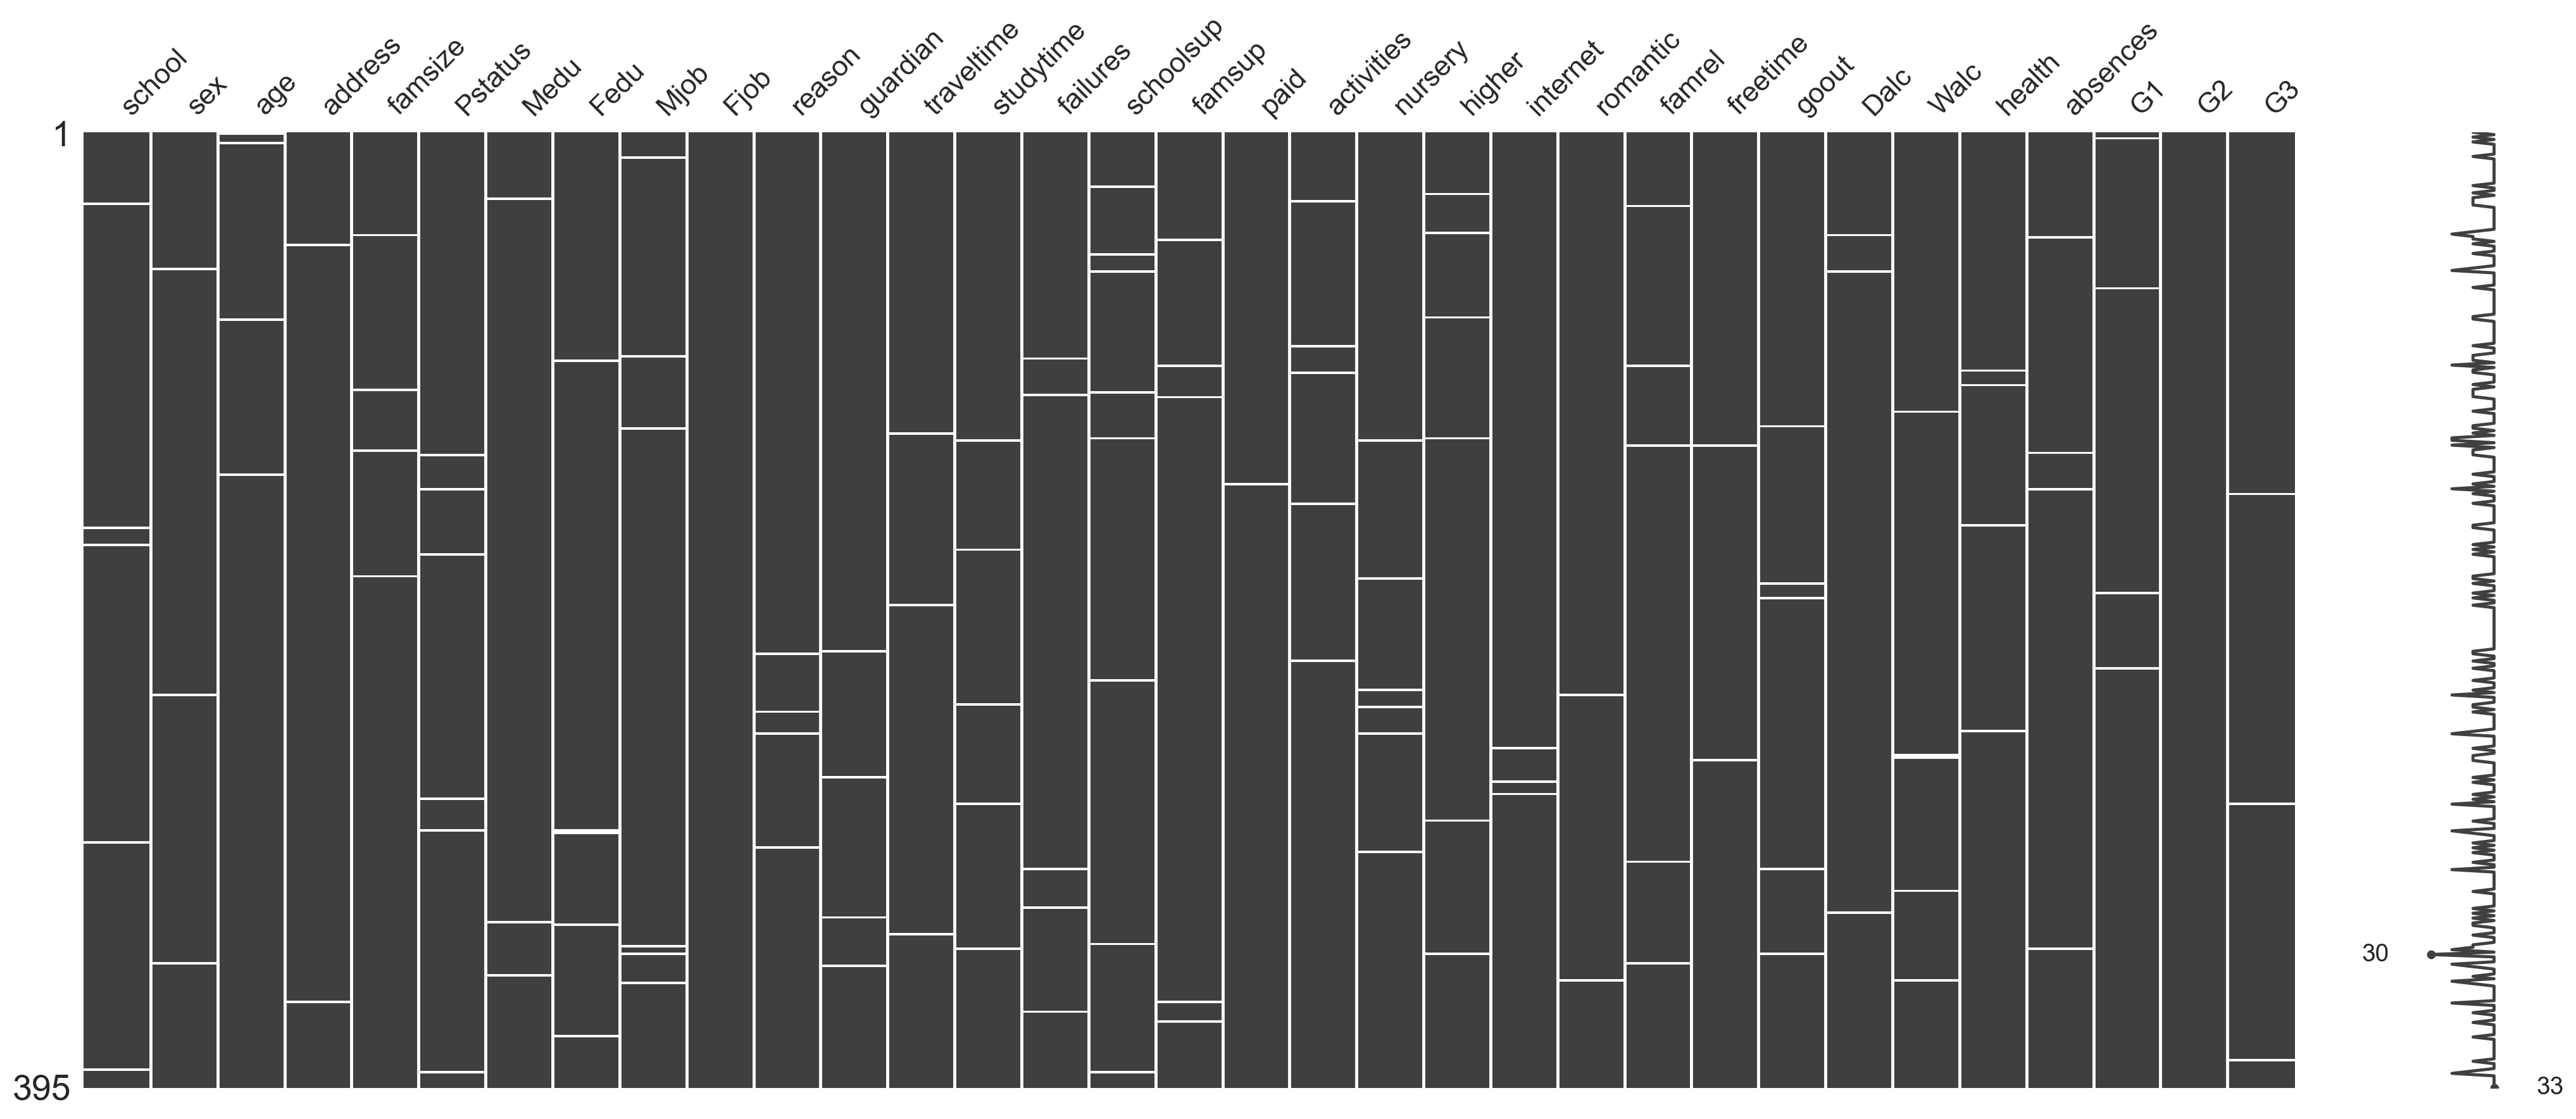

In [43]:
missingno.matrix(df)

In [44]:
df_droped_na = df.dropna()

* Se limpió la base de valores nulos, con lo que se consiguió conservar un 72% de los datos, se perdieron 111 filas y se conservaron 284.
* En el gráfico de missingno podemos observar que la ausencia de datos es equitativa para las 33 columnas del set de datos")

### Tipos de datos

In [45]:
df_droped_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 1 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      284 non-null    object
 1   sex         284 non-null    object
 2   age         284 non-null    object
 3   address     284 non-null    object
 4   famsize     284 non-null    object
 5   Pstatus     284 non-null    object
 6   Medu        284 non-null    object
 7   Fedu        284 non-null    object
 8   Mjob        284 non-null    object
 9   Fjob        284 non-null    object
 10  reason      284 non-null    object
 11  guardian    284 non-null    object
 12  traveltime  284 non-null    object
 13  studytime   284 non-null    object
 14  failures    284 non-null    object
 15  schoolsup   284 non-null    object
 16  famsup      284 non-null    object
 17  paid        284 non-null    object
 18  activities  284 non-null    object
 19  nursery     284 non-null    object
 20  higher    

In [46]:
for i in df_droped_na.axes[1]:
    if df_droped_na[i].dtype == 'object':
        print(i)
        print(df_droped_na[i].unique())
        

school
['GP' 'MS']
sex
['F' 'M']
age
['"17"' '"15"' '"16"' '"18"' '"19"' '"20"' '"21"']
address
['U' 'R']
famsize
['GT3' 'LE3']
Pstatus
['T' 'A']
Medu
['1' '4' '2' '3' '0']
Fedu
['1' '2' '3' '4' '0']
Mjob
['at_home' 'health' 'services' 'other' 'teacher']
Fjob
['other' 'services' 'teacher' 'health' 'at_home']
reason
['course' 'home' 'reputation' 'other']
guardian
['father' 'mother' 'other']
traveltime
['1' '2' '3' '4']
studytime
['2' '3' '1' '4']
failures
['0' '3' '1' '2']
schoolsup
['no' 'yes']
famsup
['yes' 'no']
paid
['no' 'yes']
activities
['no' 'yes']
nursery
['no' 'yes']
higher
['yes' 'no']
internet
['yes' 'no']
romantic
['no' 'yes']
famrel
['5' '3' '4' '2' '1']
freetime
['3' '2' '4' '1' '5']
goout
['"3"' '"2"' '"4"' '"1"' '"5"']
Dalc
['1' '2' '3' '4' '5']
Walc
['1' '2' '3' '4' '5']
health
['"3"' '"5"' '"1"' '"4"' '"2"']
absences
['4' '2' '10' '0' '6' '16' '7' '8' '25' '12' '54' '18' '14' '26' '20' '24'
 '28' '5' '13' '15' '22' '21' '1' '75' '30' '19' '11' '38' '3' '40' '9'
 '17']

In [47]:
df_droped_na.head()

school sex   age address famsize Pstatus Medu Fedu      Mjob      Fjob  \
1     GP   F  "17"       U     GT3       T    1    1   at_home     other   
3     GP   F  "15"       U     GT3       T    4    2    health  services   
5     GP   M  "16"       U     LE3       T    4    3  services     other   
6     GP   M  "16"       U     LE3       T    2    2     other     other   
7     GP   F  "17"       U     GT3       A    4    4     other   teacher   

       reason guardian traveltime studytime failures schoolsup famsup paid  \
1      course   father          1         2        0        no    yes   no   
3        home   mother          1         3        0        no    yes  yes   
5  reputation   mother          1         2        0        no    yes  yes   
6        home   mother          1         2        0        no     no   no   
7        home   mother          2         2        0       yes    yes   no   

  activities nursery higher internet romantic famrel freetime goout Dalc Walc  \
1         no      no    yes      yes       no      5        3   "3"    1    1   
3        yes     yes    yes      yes      yes      3        2   "2"    1    1   
5        yes     yes    yes      yes       no      5        4   "2"    1    2   
6         no     yes    yes      yes       no      4        4   "4"    1    1   
7         no     yes    yes       no       no      4        1   "4"    1    1   

  health absences  G1  G2  G3  
1    "3"        4   5   5   6  
3    "5"        2  15  14  15  
5    "5"       10  15  15  15  
6    "3"        0  12  12  11  
7    "1"        6   6   5   6

**Podemos observar que luego de la limpieza de valores faltantes, al analizar el tipo de datos tenemos 31/32 columnas valores tipo objeto, por lo que procederemos a analizar los valores únicos y a proceder a limpiar aquellos datos númericos contaminados con signos del tipo texto y finalmente se convertirá ese tipo de dato a numérico junto con binarizar aquellas que que tienen naturaleza binaria, todo se trabajará en el importe de functions**

### Recodificación de las variables

1. Utilizando el importe de functions, recodificaremos y binarizaremos las variables
2. Normalizaremos las varibles numéricas (excepto las binarias).

In [48]:
df_droped_na['G2'] = df_droped_na['G2'].apply(lambda x: str(x)) 
df_droped_na = df_droped_na.apply(lambda x: x.str.replace('"', ''))
df_recodificacion = functions.recodificaciones_d2(df_droped_na)
df_recodificacion['failures_bin'] = np.where(df_recodificacion['failures'] > 0,1,0)
df_recodificacion['goout_bin_gt_3'] = np.where(df_recodificacion['goout'] > 3,1,0)
df_recodificacion['Medu_gt_2'] = np.where(df_recodificacion['Medu'] > 2,1,0)
df_bin = functions.normalizar(df_recodificacion,exclude = df_recodificacion.select_dtypes('uint8').columns)

print(df_bin.shape)
print(f"**De las {df_droped_na.shape[1]} columnas originales, se procedió a agregar {df_bin.shape[1]-df_droped_na.shape[1]} columnas binarias, dejando un total {df_bin.shape[1]} columnas**")
df_bin.head()

(284, 45)
**De las 33 columnas originales, se procedió a agregar 12 columnas binarias, dejando un total 45 columnas**


age      Medu      Fedu  traveltime  studytime  failures  absences  \
1  0.227570 -1.620078 -1.394201   -0.683631  -0.058448 -0.457606 -0.194699   
3 -1.329774  1.118625 -0.477643   -0.683631   1.127213 -0.457606 -0.439907   
5 -0.551102  1.118625  0.438915   -0.683631  -0.058448 -0.457606  0.540926   
6 -0.551102 -0.707177 -0.477643   -0.683631  -0.058448 -0.457606 -0.685115   
7  0.227570  1.118625  1.355473    0.754527  -0.058448 -0.457606  0.050509   

     famrel  freetime     goout     Dalc      Walc    health        G1  \
1  1.202119 -0.182751 -0.078500 -0.54848 -0.964107 -0.475138 -1.803813   
3 -1.066331 -1.162020 -1.007412 -0.54848 -0.964107  1.041033  1.236441   
5  1.202119  0.796518 -1.007412 -0.54848 -0.186248  1.041033  1.236441   
6  0.067894  0.796518  0.850413 -0.54848 -0.964107 -0.475138  0.324365   
7  0.067894 -2.141288  0.850413 -0.54848 -0.964107 -1.991308 -1.499787   

         G2        G3  failures_bin  goout_bin_gt_3  Medu_gt_2  school_MS  \
1 -1.488656 -0.962431     -0.522091        -0.69656  -1.201323          0   
3  0.886503  1.008702     -0.522091        -0.69656   0.829485          0   
5  1.150410  1.008702     -0.522091        -0.69656   0.829485          0   
6  0.358690  0.132643     -0.522091         1.43057  -1.201323          0   
7 -1.488656 -0.962431     -0.522091         1.43057   0.829485          0   

   sex_M  address_U  famsize_LE3  Pstatus_T  schoolsup_yes  famsup_yes  \
1      0          1            0          1              0           1   
3      0          1            0          1              0           1   
5      1          1            1          1              0           1   
6      1          1            1          1              0           0   
7      0          1            0          0              1           1   

   paid_yes  activities_yes  nursery_yes  higher_yes  internet_yes  \
1         0               0            0           1             1   
3         1               1            1           1             1   
5         1               1            1           1             1   
6         0               0            1           1             1   
7         0               0            1           1             0   

   romantic_yes  Mjob_health  Mjob_other  Mjob_services  Mjob_teacher  \
1             0            0           0              0             0   
3             1            1           0              0             0   
5             0            0           0              1             0   
6             0            0           1              0             0   
7             0            0           1              0             0   

   Fjob_health  Fjob_other  Fjob_services  Fjob_teacher  reason_home  \
1            0           1              0             0            0   
3            0           0              1             0            1   
5            0           1              0             0            0   
6            0           1              0             0            1   
7            0           0              0             1            1   

   reason_other  reason_reputation  guardian_mother  guardian_other  
1             0                  0                0               0  
3             0                  0                1               0  
5             0                  1                1               0  
6             0                  0                1               0  
7             0                  0                1               0

In [49]:
df_recodificacion.head()

age  Medu  Fedu  traveltime  studytime  failures  absences  famrel  \
1   17     1     1           1          2         0         4       5   
3   15     4     2           1          3         0         2       3   
5   16     4     3           1          2         0        10       5   
6   16     2     2           1          2         0         0       4   
7   17     4     4           2          2         0         6       4   

   freetime  goout  Dalc  Walc  health  G1  G2  G3  school_MS  sex_M  \
1         3      3     1     1       3   5   5   6          0      0   
3         2      2     1     1       5  15  14  15          0      0   
5         4      2     1     2       5  15  15  15          0      1   
6         4      4     1     1       3  12  12  11          0      1   
7         1      4     1     1       1   6   5   6          0      0   

   address_U  famsize_LE3  Pstatus_T  schoolsup_yes  famsup_yes  paid_yes  \
1          1            0          1              0           1         0   
3          1            0          1              0           1         1   
5          1            1          1              0           1         1   
6          1            1          1              0           0         0   
7          1            0          0              1           1         0   

   activities_yes  nursery_yes  higher_yes  internet_yes  romantic_yes  \
1               0            0           1             1             0   
3               1            1           1             1             1   
5               1            1           1             1             0   
6               0            1           1             1             0   
7               0            1           1             0             0   

   Mjob_health  Mjob_other  Mjob_services  Mjob_teacher  Fjob_health  \
1            0           0              0             0            0   
3            1           0              0             0            0   
5            0           0              1             0            0   
6            0           1              0             0            0   
7            0           1              0             0            0   

   Fjob_other  Fjob_services  Fjob_teacher  reason_home  reason_other  \
1           1              0             0            0             0   
3           0              1             0            1             0   
5           1              0             0            0             0   
6           1              0             0            1             0   
7           0              0             1            1             0   

   reason_reputation  guardian_mother  guardian_other  failures_bin  \
1                  0                0               0             0   
3                  0                1               0             0   
5                  1                1               0             0   
6                  0                1               0             0   
7                  0                1               0             0   

   goout_bin_gt_3  Medu_gt_2  
1               0          0  
3               0          1  
5               0          1  
6               1          0  
7               1          1

In [50]:
df_droped_na.head()

school sex age address famsize Pstatus Medu Fedu      Mjob      Fjob  \
1     GP   F  17       U     GT3       T    1    1   at_home     other   
3     GP   F  15       U     GT3       T    4    2    health  services   
5     GP   M  16       U     LE3       T    4    3  services     other   
6     GP   M  16       U     LE3       T    2    2     other     other   
7     GP   F  17       U     GT3       A    4    4     other   teacher   

       reason guardian traveltime studytime failures schoolsup famsup paid  \
1      course   father          1         2        0        no    yes   no   
3        home   mother          1         3        0        no    yes  yes   
5  reputation   mother          1         2        0        no    yes  yes   
6        home   mother          1         2        0        no     no   no   
7        home   mother          2         2        0       yes    yes   no   

  activities nursery higher internet romantic famrel freetime goout Dalc Walc  \
1         no      no    yes      yes       no      5        3     3    1    1   
3        yes     yes    yes      yes      yes      3        2     2    1    1   
5        yes     yes    yes      yes       no      5        4     2    1    2   
6         no     yes    yes      yes       no      4        4     4    1    1   
7         no     yes    yes       no       no      4        1     4    1    1   

  health absences  G1  G2  G3  
1      3        4   5   5   6  
3      5        2  15  14  15  
5      5       10  15  15  15  
6      3        0  12  12  11  
7      1        6   6   5   6

In [51]:
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 1 to 394
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                284 non-null    float64
 1   Medu               284 non-null    float64
 2   Fedu               284 non-null    float64
 3   traveltime         284 non-null    float64
 4   studytime          284 non-null    float64
 5   failures           284 non-null    float64
 6   absences           284 non-null    float64
 7   famrel             284 non-null    float64
 8   freetime           284 non-null    float64
 9   goout              284 non-null    float64
 10  Dalc               284 non-null    float64
 11  Walc               284 non-null    float64
 12  health             284 non-null    float64
 13  G1                 284 non-null    float64
 14  G2                 284 non-null    float64
 15  G3                 284 non-null    float64
 16  failures_bin       284 non

## Análisis exploratorio

### Análisis exploratorio inicial de variables numéricas continuas

In [52]:
df_recodificacion.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  284.000000  284.000000  284.000000  284.000000  284.000000  284.000000   
mean    16.707746    2.774648    2.521127    1.475352    2.049296    0.334507   
std      1.284238    1.095409    1.091038    0.695334    0.843411    0.730994   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    3.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     21.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

         absences      famrel   freetime       goout        Dalc        Walc  \
count  284.000000  284.000000  284.00000  284.000000  284.000000  284.000000   
mean     5.588028    3.940141    3.18662    3.084507    1.482394    2.239437   
std      8.156335    0.881659    1.02117    1.076527    0.879512    1.285580   
min      0.000000    1.000000    1.00000    1.000000    1.000000    1.000000   
25%      0.000000    4.000000    3.00000    2.000000    1.000000    1.000000   
50%      4.000000    4.000000    3.00000    3.000000    1.000000    2.000000   
75%      7.000000    5.000000    4.00000    4.000000    2.000000    3.000000   
max     75.000000    5.000000    5.00000    5.000000    5.000000    5.000000   

           health          G1          G2          G3   school_MS       sex_M  \
count  284.000000  284.000000  284.000000  284.000000  284.000000  284.000000   
mean     3.626761   10.933099   10.640845   10.394366    0.130282    0.482394   
std      1.319113    3.289199    3.789220    4.565902    0.337207    0.500572   
min      1.000000    4.000000    0.000000    0.000000    0.000000    0.000000   
25%      3.000000    8.000000    9.000000    8.000000    0.000000    0.000000   
50%      4.000000   11.000000   10.500000   11.000000    0.000000    0.000000   
75%      5.000000   13.000000   13.000000   13.000000    0.000000    1.000000   
max      5.000000   19.000000   19.000000   20.000000    1.000000    1.000000   

        address_U  famsize_LE3  Pstatus_T  schoolsup_yes  famsup_yes  \
count  284.000000   284.000000  284.00000     284.000000  284.000000   
mean     0.753521     0.264085    0.90493       0.133803    0.612676   
std      0.431721     0.441623    0.29383       0.341041    0.487999   
min      0.000000     0.000000    0.00000       0.000000    0.000000   
25%      1.000000     0.000000    1.00000       0.000000    0.000000   
50%      1.000000     0.000000    1.00000       0.000000    1.000000   
75%      1.000000     1.000000    1.00000       0.000000    1.000000   
max      1.000000     1.000000    1.00000       1.000000    1.000000   

         paid_yes  activities_yes  nursery_yes  higher_yes  internet_yes  \
count  284.000000      284.000000   284.000000  284.000000    284.000000   
mean     0.443662        0.521127     0.785211    0.947183      0.813380   
std      0.497693        0.500435     0.411401    0.224063      0.390294   
min      0.000000        0.000000     0.000000    0.000000      0.000000   
25%      0.000000        0.000000     1.000000    1.000000      1.000000   
50%      0.000000        1.000000     1.000000    1.000000      1.000000   
75%      1.000000        1.000000     1.000000    1.000000      1.000000   
max      1.000000        1.000000     1.000000    1.000000      1.000000   

       romantic_yes  Mjob_health  Mjob_other  Mjob_services  Mjob_teacher  \
count    284.000000   284.000000  284.000000     284.000000    284.000000   
mean       0.334507     0.091549    0.362676       0.239437      0.154930   
std        0.472651     0.288898    0.481621       0.427493      0.362476   
min        0.000000     0.000000    0.000000       0.000000      0.000000   
25%        0.000000     0.000000    0.000000       0.000000      0.000000   
50%        0.000000     0.000000    0

### Correlación:

<AxesSubplot:>

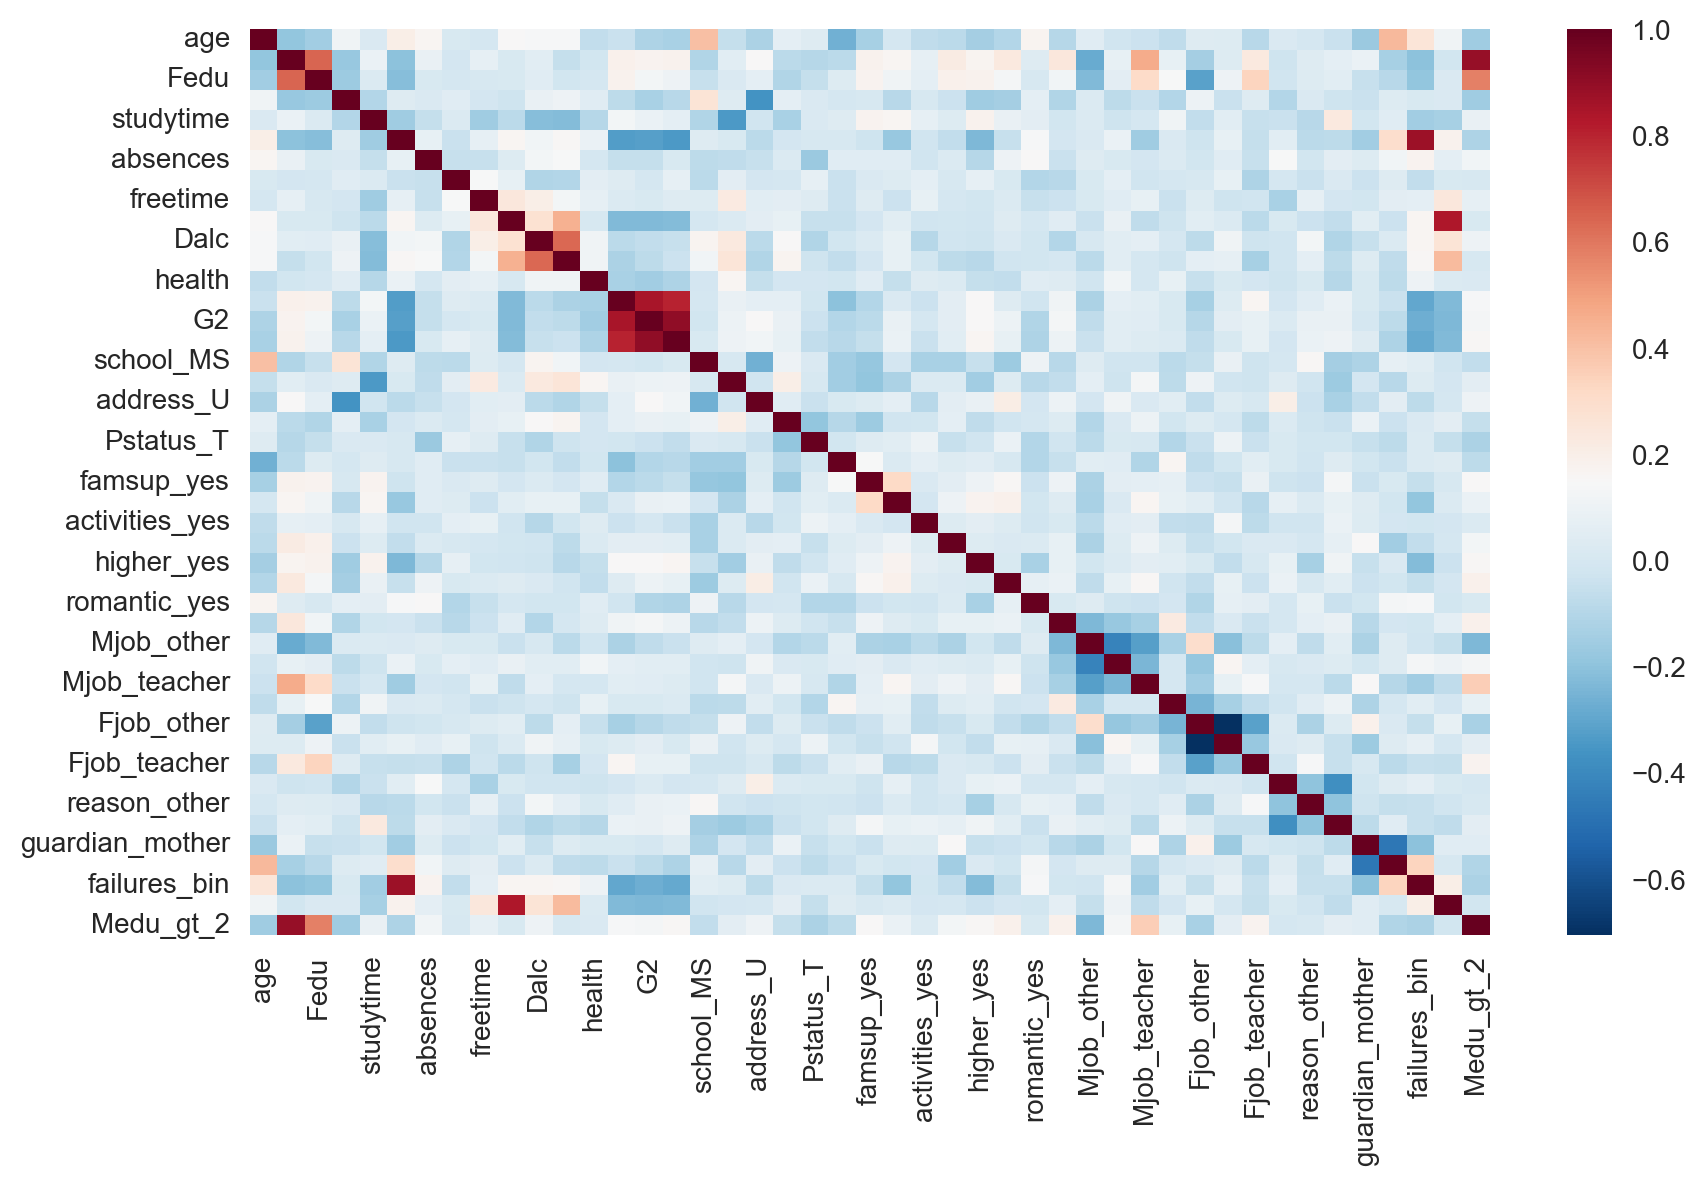

In [53]:
sns.heatmap(df_recodificacion.corr(), cmap = 'RdBu_r')

<AxesSubplot:>

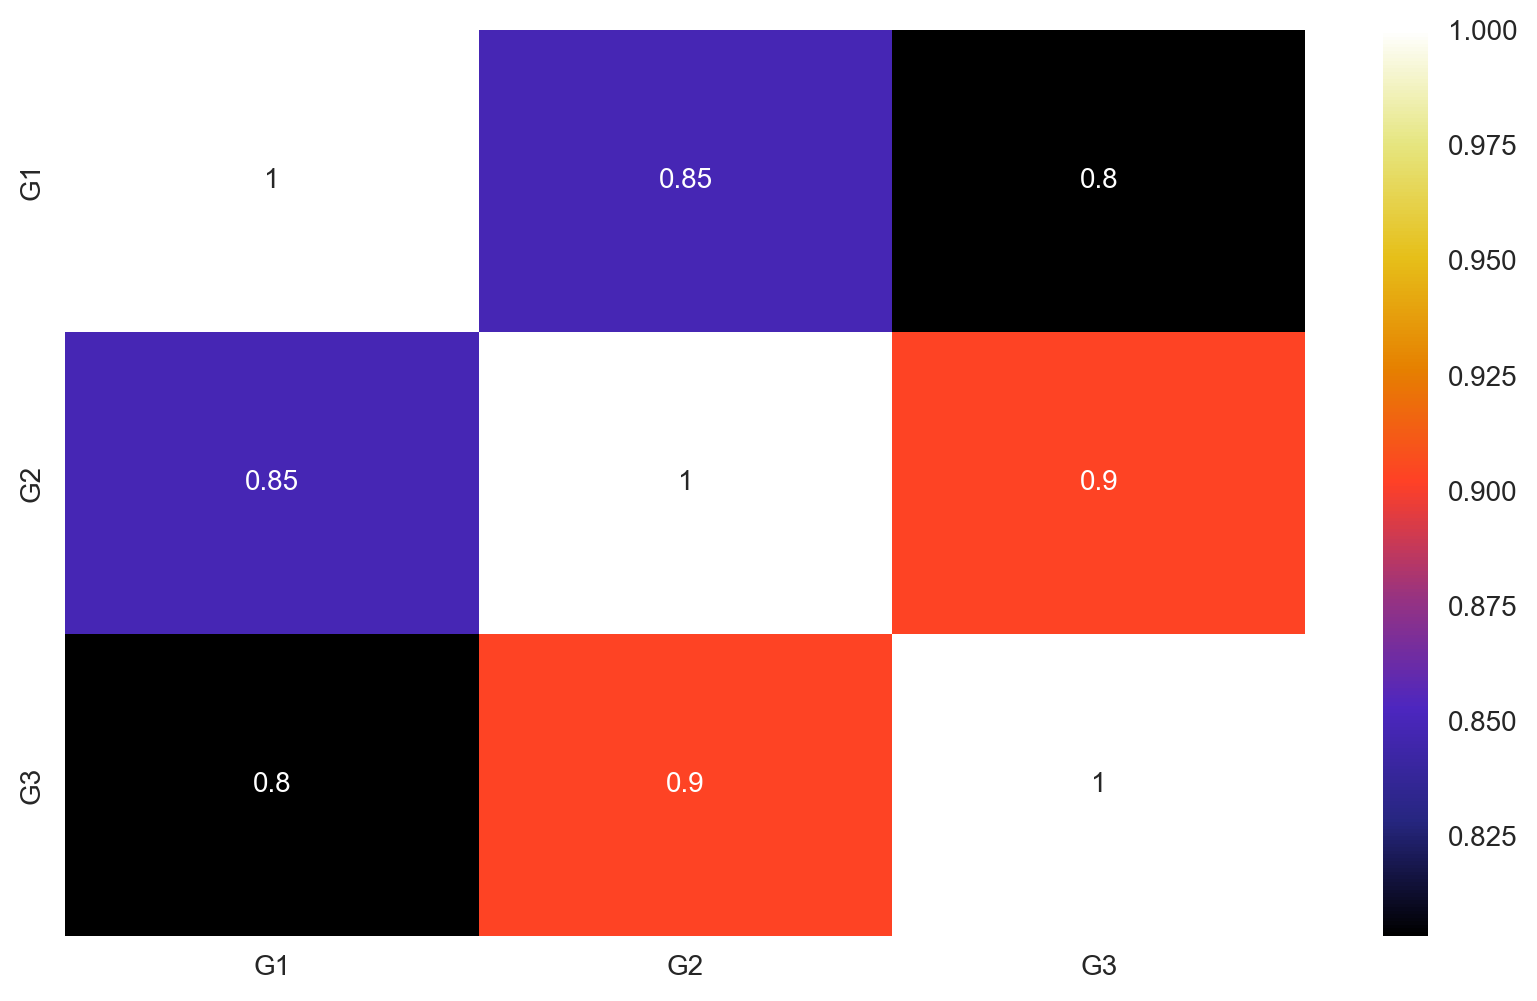

In [54]:
sns.heatmap(df_recodificacion.loc[:, ['G1','G2','G3']].corr(), cmap = 'CMRmap', annot = True)

**Podemos observar múltiples correlaciones como por ejemplo las notas en G1, G2, G3 fuertemente correlacionadas, también que las zonas rurales son inversamente proporcional al tiempo de trayectoría. Ver esto nos sirve para entender a grandes rasgos la situación pero por sobre todo para entender que es mejor hacer un análisis más preciso, por lo que procederé a hacerlo por Failures y los respectivos G**

-----------

#### Failures

In [55]:
df_bin.corr()['failures'].to_frame().assign(absolute = df_bin.corr()['failures'].abs()).sort_values(by='absolute', ascending = False).drop('absolute',axis=1)[1:20]

failures
failures_bin     0.876485
G3              -0.345628
G1              -0.328676
G2              -0.322600
guardian_other   0.294434
higher_yes      -0.236934
Fedu            -0.214914
age              0.206134
Medu            -0.205603
goout_bin_gt_3   0.183961
paid_yes        -0.176264
goout            0.166014
studytime       -0.158663
Mjob_teacher    -0.156273
Walc             0.155118
guardian_mother -0.146979
romantic_yes     0.135223
Medu_gt_2       -0.119737
Dalc             0.116367

* Podemos observar que la relación de la cantidad de clases reprobadas, obviando la directa relación con los G, dejan en evidencia que hay una fuerte correlación con el tutor, cuando éste no es padre directo, muy de cerca con si desea continuar estudias superiores y la educación del padre.
* Esto muestra que es importante los factores externos como el tutor, la educación de los tutores y si es pagado, versus factores más propios como, si el estudiante desea seguir estudios superiores, sale con amigos, tiempo de estudio, consumo de alcohol.

#### G3

In [56]:
df_bin.corr()['G3'].to_frame().assign(absolute = df_bin.corr()['G3'].abs()).sort_values(by='absolute', ascending = False).drop('absolute',axis=1)[1:20]

G3
G2                 0.902984
G1                 0.803384
failures          -0.345628
failures_bin      -0.289802
goout_bin_gt_3    -0.226642
goout             -0.221752
Medu               0.180326
higher_yes         0.162044
Medu_gt_2          0.158338
age               -0.132134
address_U          0.119397
health            -0.116279
romantic_yes      -0.115377
guardian_other    -0.115167
Fedu               0.106139
reason_reputation  0.105372
sex_M              0.101995
Mjob_health        0.098437
traveltime        -0.091532

#### G2

In [57]:
df_bin.corr()['G2'].to_frame().assign(absolute = df_bin.corr()['G2'].abs()).sort_values(by='absolute', ascending = False).drop('absolute',axis=1)[1:20]

G2
G3              0.902984
G1              0.848606
failures       -0.322600
failures_bin   -0.269948
goout_bin_gt_3 -0.233271
goout          -0.231616
Medu            0.179638
address_U       0.153058
health         -0.152749
higher_yes      0.152379
Medu_gt_2       0.133206
traveltime     -0.132120
Mjob_health     0.126979
Fedu            0.123212
age            -0.118948
romantic_yes   -0.110251
schoolsup_yes  -0.104869
Fjob_other     -0.099191
sex_M           0.097253

#### G1

In [58]:
df_bin.corr()['G1'].to_frame().assign(absolute = df_bin.corr()['G1'].abs()).sort_values(by='absolute', ascending = False).drop('absolute',axis=1)[1:20]

G1
G2              0.848606
G3              0.803384
failures       -0.328676
failures_bin   -0.294867
goout_bin_gt_3 -0.228010
goout          -0.226923
schoolsup_yes  -0.206195
Medu            0.189984
Fedu            0.181079
Fjob_teacher    0.165586
higher_yes      0.153411
Fjob_other     -0.139045
Medu_gt_2       0.137969
health         -0.128751
studytime       0.126020
Walc           -0.122382
Mjob_other     -0.120695
Mjob_health     0.110589
famsup_yes     -0.104258

#### Study time

In [59]:
df_bin.corr()['studytime'].to_frame().assign(absolute = df_bin.corr()['studytime'].abs()).sort_values(by='absolute', ascending = False).drop('absolute',axis=1)[1:20]

studytime
sex_M              -0.341093
reason_reputation   0.227713
Walc               -0.226014
Dalc               -0.213187
higher_yes          0.182112
famsup_yes          0.175334
paid_yes            0.166583
failures           -0.158663
freetime           -0.158419
failures_bin       -0.152829
goout_bin_gt_3     -0.138887
famsize_LE3        -0.129943
G1                  0.126020
school_MS          -0.109633
Fjob_health         0.107242
traveltime         -0.100351
health             -0.097743
G2                  0.092907
reason_other       -0.090271

* La variable study time se analizó de manera particular, dado que ha simple vista se piensa que podría ser la variable más influyente pero podemos observar de que no está relacionada con G3 pero si en menor manera con G1.
    * Esta variable está mayormente relacionada con las mujeres, variables de consumo de alcohol, la razón de incorporación por reputación.  

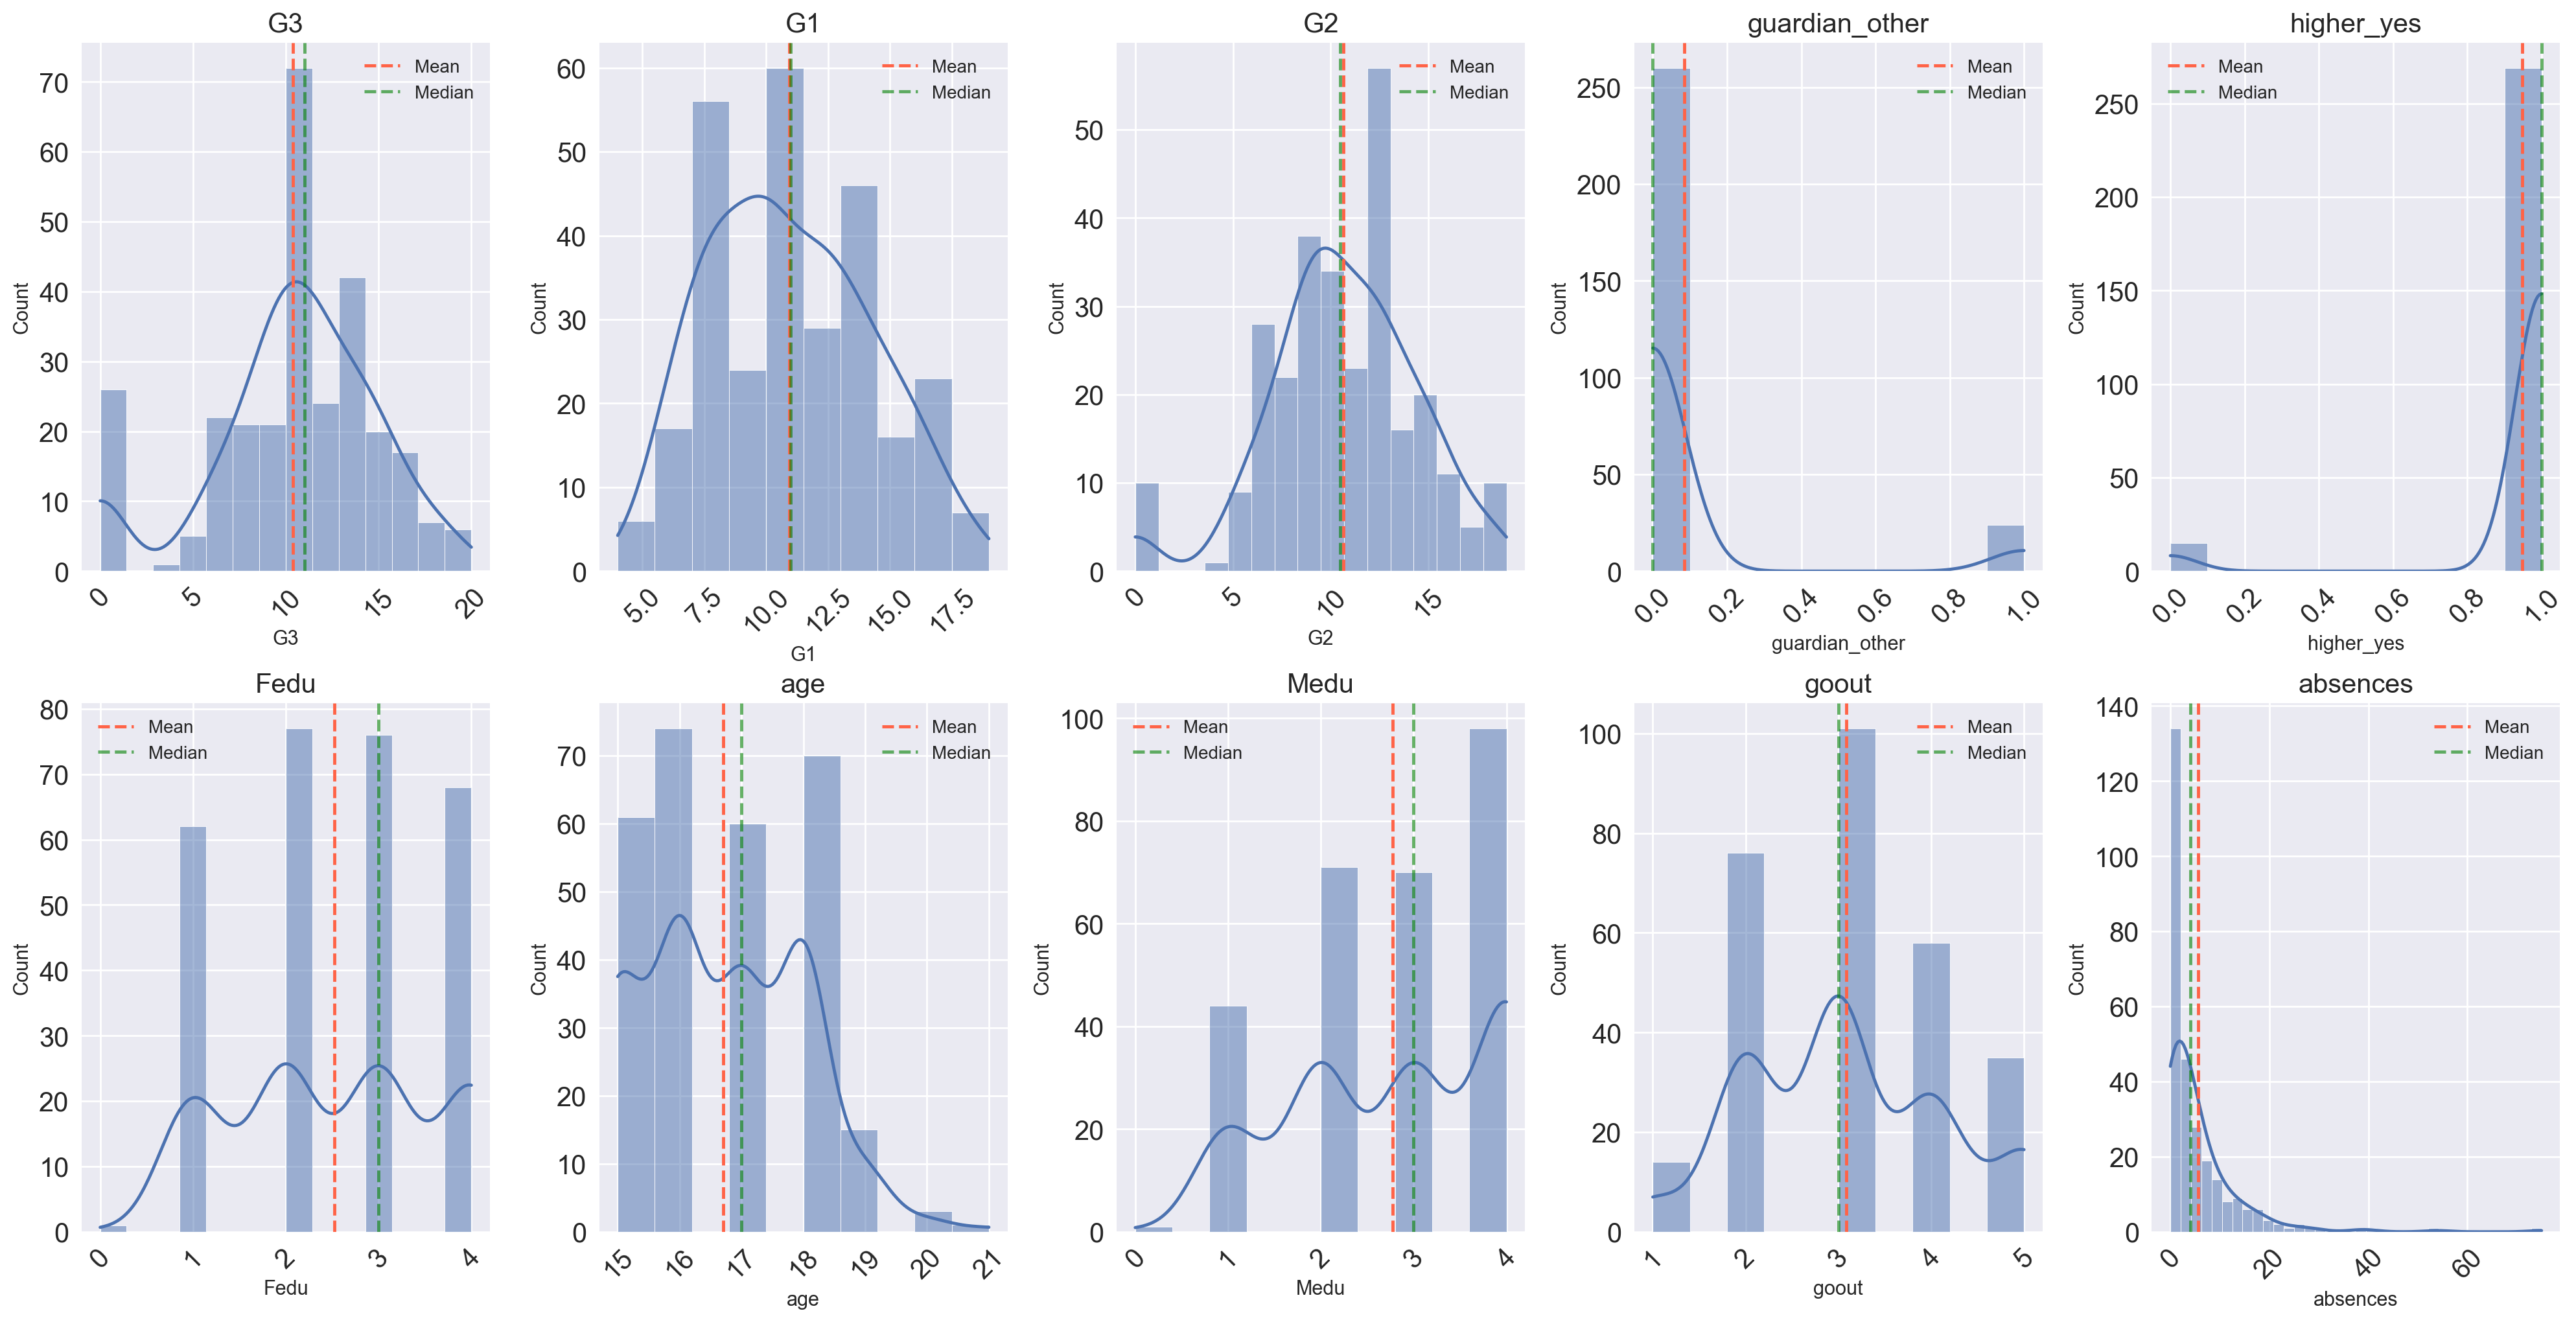

In [60]:
df_tmp = df_recodificacion.loc[:,['G3','G1','G2', 'guardian_other', 'higher_yes','Fedu', 'age','Medu','goout','absences']].copy()
n = df_tmp.select_dtypes(np.number).shape[1] if df_tmp.select_dtypes(np.number).shape[1]%2 == 0 else df_tmp.select_dtypes(np.number).shape[1] + 1
filas, columnas= round(n/2), round(n/2)

plt.figure(figsize=(2*n, filas*columnas))
for i, (colname, serie) in enumerate(df_tmp.select_dtypes(np.number).iteritems()):
    plt.subplot(filas,columnas, i+1)
    plt.title(colname, fontsize=15)
    sns.histplot(serie,kde=True)
    plt.axvline(serie.mean(),color='tomato', linestyle = '--',label=f'Mean')
    plt.axvline(serie.median(),color='green',  linestyle = '--',label=f'Median',alpha=0.6)
    plt.xticks(rotation=45,fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend()
    
plt.tight_layout()

In [61]:
not_in = ['G3','G2','G1','goout','Medu','Fedu','age','absences']

df_tmp = df_droped_na.loc[:,[i for i in df_droped_na.columns if i not in not_in]].copy()
n = df_tmp.select_dtypes('object').shape[1] if df_tmp.select_dtypes('object').shape[1]%2 == 0 else df_tmp.select_dtypes('object').shape[1] + 1

divisores = lambda n : [i for i in range(1, int(n/2) +1) if n % i ==0 and i >1]
filas, columnas= divisores(n)[0], divisores(n)[1]

plt.figure(figsize=(5*n, filas*columnas))
for i, (colname, serie) in enumerate(df_tmp.select_dtypes('object').iteritems()):
    plt.subplot(filas,columnas, i+1)
    plt.title(colname, fontsize=15)
    ax = sns.barplot(serie.value_counts().index, serie.value_counts().values,color='b',alpha=.8,palette='Set1')
    
    ax.bar_label(ax.containers[0], labels=[f'{round(i*100,2):}%' for i in serie.value_counts('%').values], fontsize=15)
    
    plt.xticks(rotation=45,fontsize=15)
    plt.yticks(fontsize=15)
    
plt.tight_layout()

* Podemos observar que la mayor cantidad de información es de la escuela GP, con un 87%
    * Obs: Esto muestra, que practicamente estaremos analizando 1 escuela. 
* Similar proporción hombre y mujer
* La mayor cantidad de alumnos son de zonas urbanas, con un 75%
* Con un 74% las familias son mayor a 3 integrantes
* Pstatus: El estadao cohabitacional de los padres, en un 91% es que viven juntos
* M & F job: Vemos diferencias en los sectores de la madre vs. el padre, siendo la del padre de manera amplia (55%) por Other, y la menor ser dueño de casa (3%), en comparación con la madre que podemos observar mayor proporción en comparación del padre en dueña de casa 15% y teacher 15%
* Reason: Podemos observar que el motivo predominante de la selección de la escuela es debido a la preferencia de cursos 36% y en segundo lugar quedan empatadas la cercanía, junto con la reputación
* Guardian: Es interesante observar que de forma substancial el apodereado del menor es la madre en un 70% de los casos
* Travel time: Cerca del 90% de los alumnos se demoran menos de 30% minutos a la escuela
    * Obs: Será interesante ver si hay relación con los alumnos que se demoran más en llegar a la escuela y las malas calificaciones y/o failures
* Study time: Esta variable muestra que cerca de un 50% de los alumnos lde dedican entre 2 y 5 horas semanales a sus estudios
    * Obs: Será interesante analizar esta variable con las calificaciones y failures
* Failures: Es interesante  ver que cerca del 80% de los alumnos no fallan los cursos.
    * Obs: Será interesante binarizar esta variable, entre aquellos que reprueban y los que no
    * Obs: Será interesante comparar esta variable con la aprobación final del G3
* Schoolsupup: Es interesante observar que cerca del 87% de los alumnos no reciben apoyo del colegio, lo que muestra que quizás no sea tan importante pero será interesante evaluar los casos en donde si hay apoyo para ver si influye en algunos casos
* Famsup: Es interesante observar que la mayoría de los alumnos no reciben apoyo de las familias en un 61%, será interesante analizar si hay diferencias substanciales en aquellos casos.
* Paid: Podemos observar que cerca de un 44% de los alumnos recibe clases particulares pagadas.
    * Obs: Al parecer es una variable muy similar al apoyo familiar, será interesante observar que tan relacionadas están
* Activities: Se puede apreciar que cerca de un 48% de los alumnos hace actividades extracurriculares 47%.
    * Obs: Analizar si está relacionado al Study time y las notas.
* Nursery: Podemos observar que de manera substancial los alumnos si fueron al jardín infantil
    * Obs: Analizar si los que no fueron tienen un peor desempeño educacional
* Higher: De manera substancial 95% los alumnos desean tener una educación superior, podemos ver que los alumnos que no tienen peores notas, esto lo confirmaremos más adelante.
* Internet: De manera substancial 81% los alumnos si cuentan con conexión de internet en sus casas.
    * Obs: Ver si está correlacionado a si es sector rural o urbano y si tiene incidencia en sus notas.
* Romantic: Podemos observar que cerca de un 33% de los alumnos tiene una relación amorosa.
    * Hay que analizar si  tiene relación con bajas calificaciones y a las horas de estudio.
* Famrel: Podemos apreciar que en su mayoría 90% los alumnos tienen buena relacion familiar
    * Obs: Analizar la relación con los que no y sus calificaciones
* Freetime: Podemos observar que en general los niños tienen tiempo libre después de la escuela (~70%)
    * Obs: Analizar los casos de que no y calificaciones
* Dalc: En general los jovenes presentan poco consumo de alcohol en la semana(70%)
    * Obs: Analizar el 10% que consume fuera de la norma y relacionarlo a sus calificaciones
* Walc: El consumo de alcohol los fines de semana, se eleva en general si lo  comparamos con consumo de alcohol en la semana.
* Health: El estado de salud actual que en general es positivo pero es **alarmante** ver cerca de un 20% de los alumnos, en donde el estado de salud es malo.
    * Obs: Analizar el 20% más malo de salud y ver su relación con las notas.

In [62]:
df_recodificacion['bad_health_bin'] = np.where(df_recodificacion['health']<3,1,0)
df_recodificacion.head()

age  Medu  Fedu  traveltime  studytime  failures  absences  famrel  \
1   17     1     1           1          2         0         4       5   
3   15     4     2           1          3         0         2       3   
5   16     4     3           1          2         0        10       5   
6   16     2     2           1          2         0         0       4   
7   17     4     4           2          2         0         6       4   

   freetime  goout  Dalc  Walc  health  G1  G2  G3  school_MS  sex_M  \
1         3      3     1     1       3   5   5   6          0      0   
3         2      2     1     1       5  15  14  15          0      0   
5         4      2     1     2       5  15  15  15          0      1   
6         4      4     1     1       3  12  12  11          0      1   
7         1      4     1     1       1   6   5   6          0      0   

   address_U  famsize_LE3  Pstatus_T  schoolsup_yes  famsup_yes  paid_yes  \
1          1            0          1              0           1         0   
3          1            0          1              0           1         1   
5          1            1          1              0           1         1   
6          1            1          1              0           0         0   
7          1            0          0              1           1         0   

   activities_yes  nursery_yes  higher_yes  internet_yes  romantic_yes  \
1               0            0           1             1             0   
3               1            1           1             1             1   
5               1            1           1             1             0   
6               0            1           1             1             0   
7               0            1           1             0             0   

   Mjob_health  Mjob_other  Mjob_services  Mjob_teacher  Fjob_health  \
1            0           0              0             0            0   
3            1           0              0             0            0   
5            0           0              1             0            0   
6            0           1              0             0            0   
7            0           1              0             0            0   

   Fjob_other  Fjob_services  Fjob_teacher  reason_home  reason_other  \
1           1              0             0            0             0   
3           0              1             0            1             0   
5           1              0             0            0             0   
6           1              0             0            1             0   
7           0              0             1            1             0   

   reason_reputation  guardian_mother  guardian_other  failures_bin  \
1                  0                0               0             0   
3                  0                1               0             0   
5                  1                1               0             0   
6                  0                1               0             0   
7                  0                1               0             0   

   goout_bin_gt_3  Medu_gt_2  bad_health_bin  
1               0          0               0  
3               0          1               0  
5               0          1               0  
6               1          0               0  
7               1          1               1

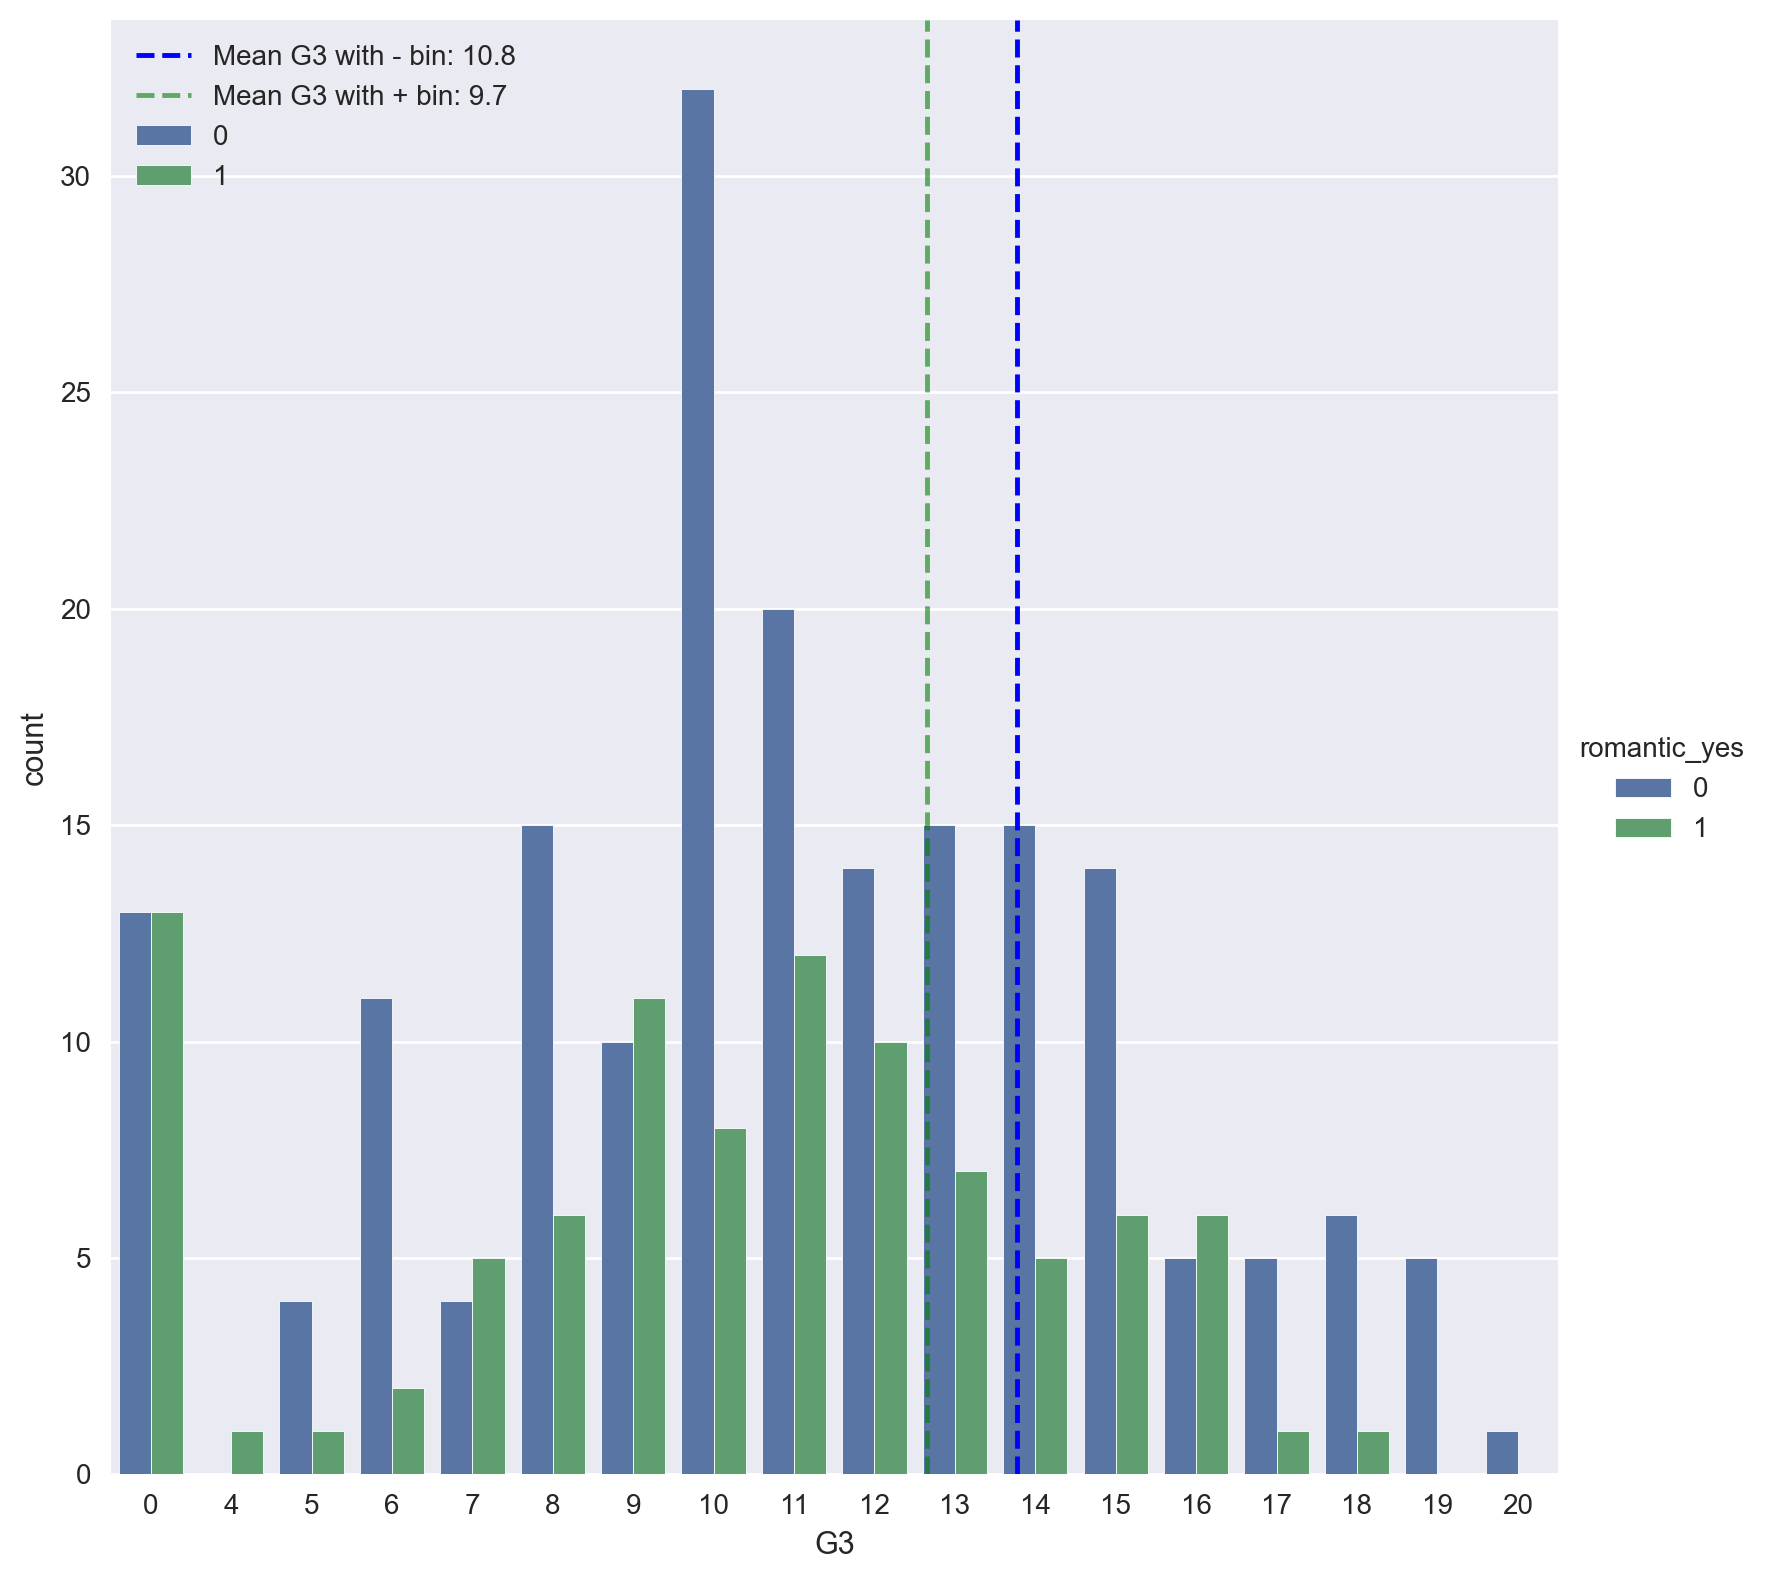

In [63]:
df_tmp = df_recodificacion.copy()
#plt.figure(figsize= (40,20))
sns.catplot(data=df_recodificacion,kind='count', x="G3",hue='romantic_yes',height=8)
plt.axvline(df_tmp['G3'][df_tmp['romantic_yes']==0].mean(),color='blue', linestyle = '--',label=f"Mean G3 with - bin: {round(df_tmp['G3'][df_tmp['romantic_yes']==0].mean(),1)}")
plt.axvline(df_tmp['G3'][df_tmp['romantic_yes']==1].mean(),color='green',  linestyle = '--',label=f"Mean G3 with + bin: {round(df_tmp['G3'][df_tmp['romantic_yes']==1].mean(),1)}",alpha=0.6)
plt.legend()

* Podemos observar que alumnos que no tienen una relación amorosa, en promedio les va mejor, cerca de 1 punto más

### Análisis G3

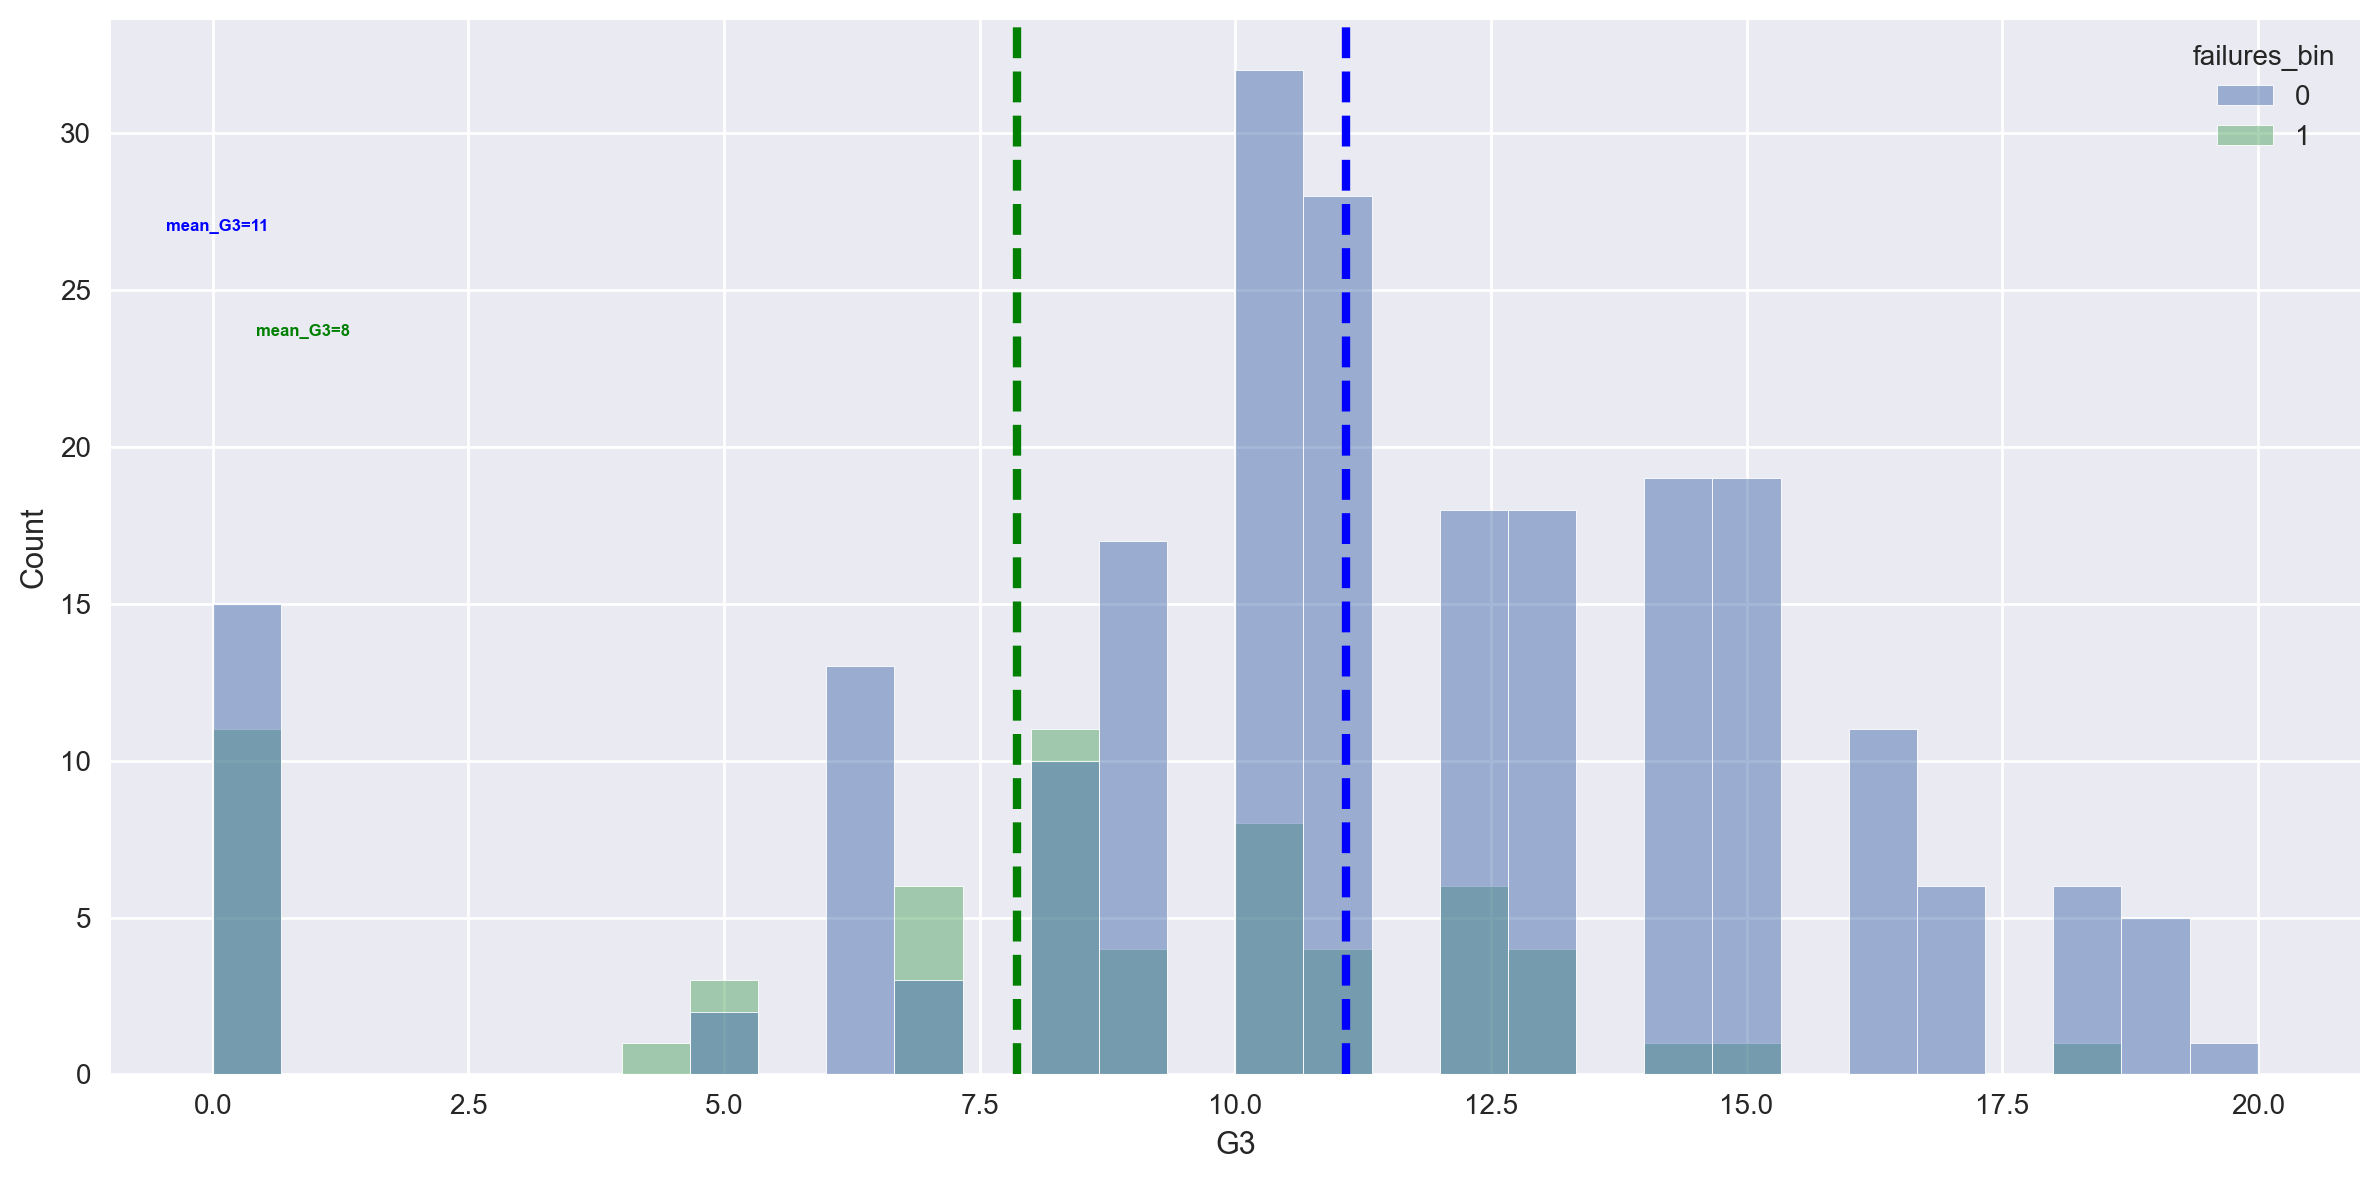

In [64]:
plt.figure(figsize = (12,6))
functions.grafico_hist(df_recodificacion,'G3','failures_bin')
plt.tight_layout()

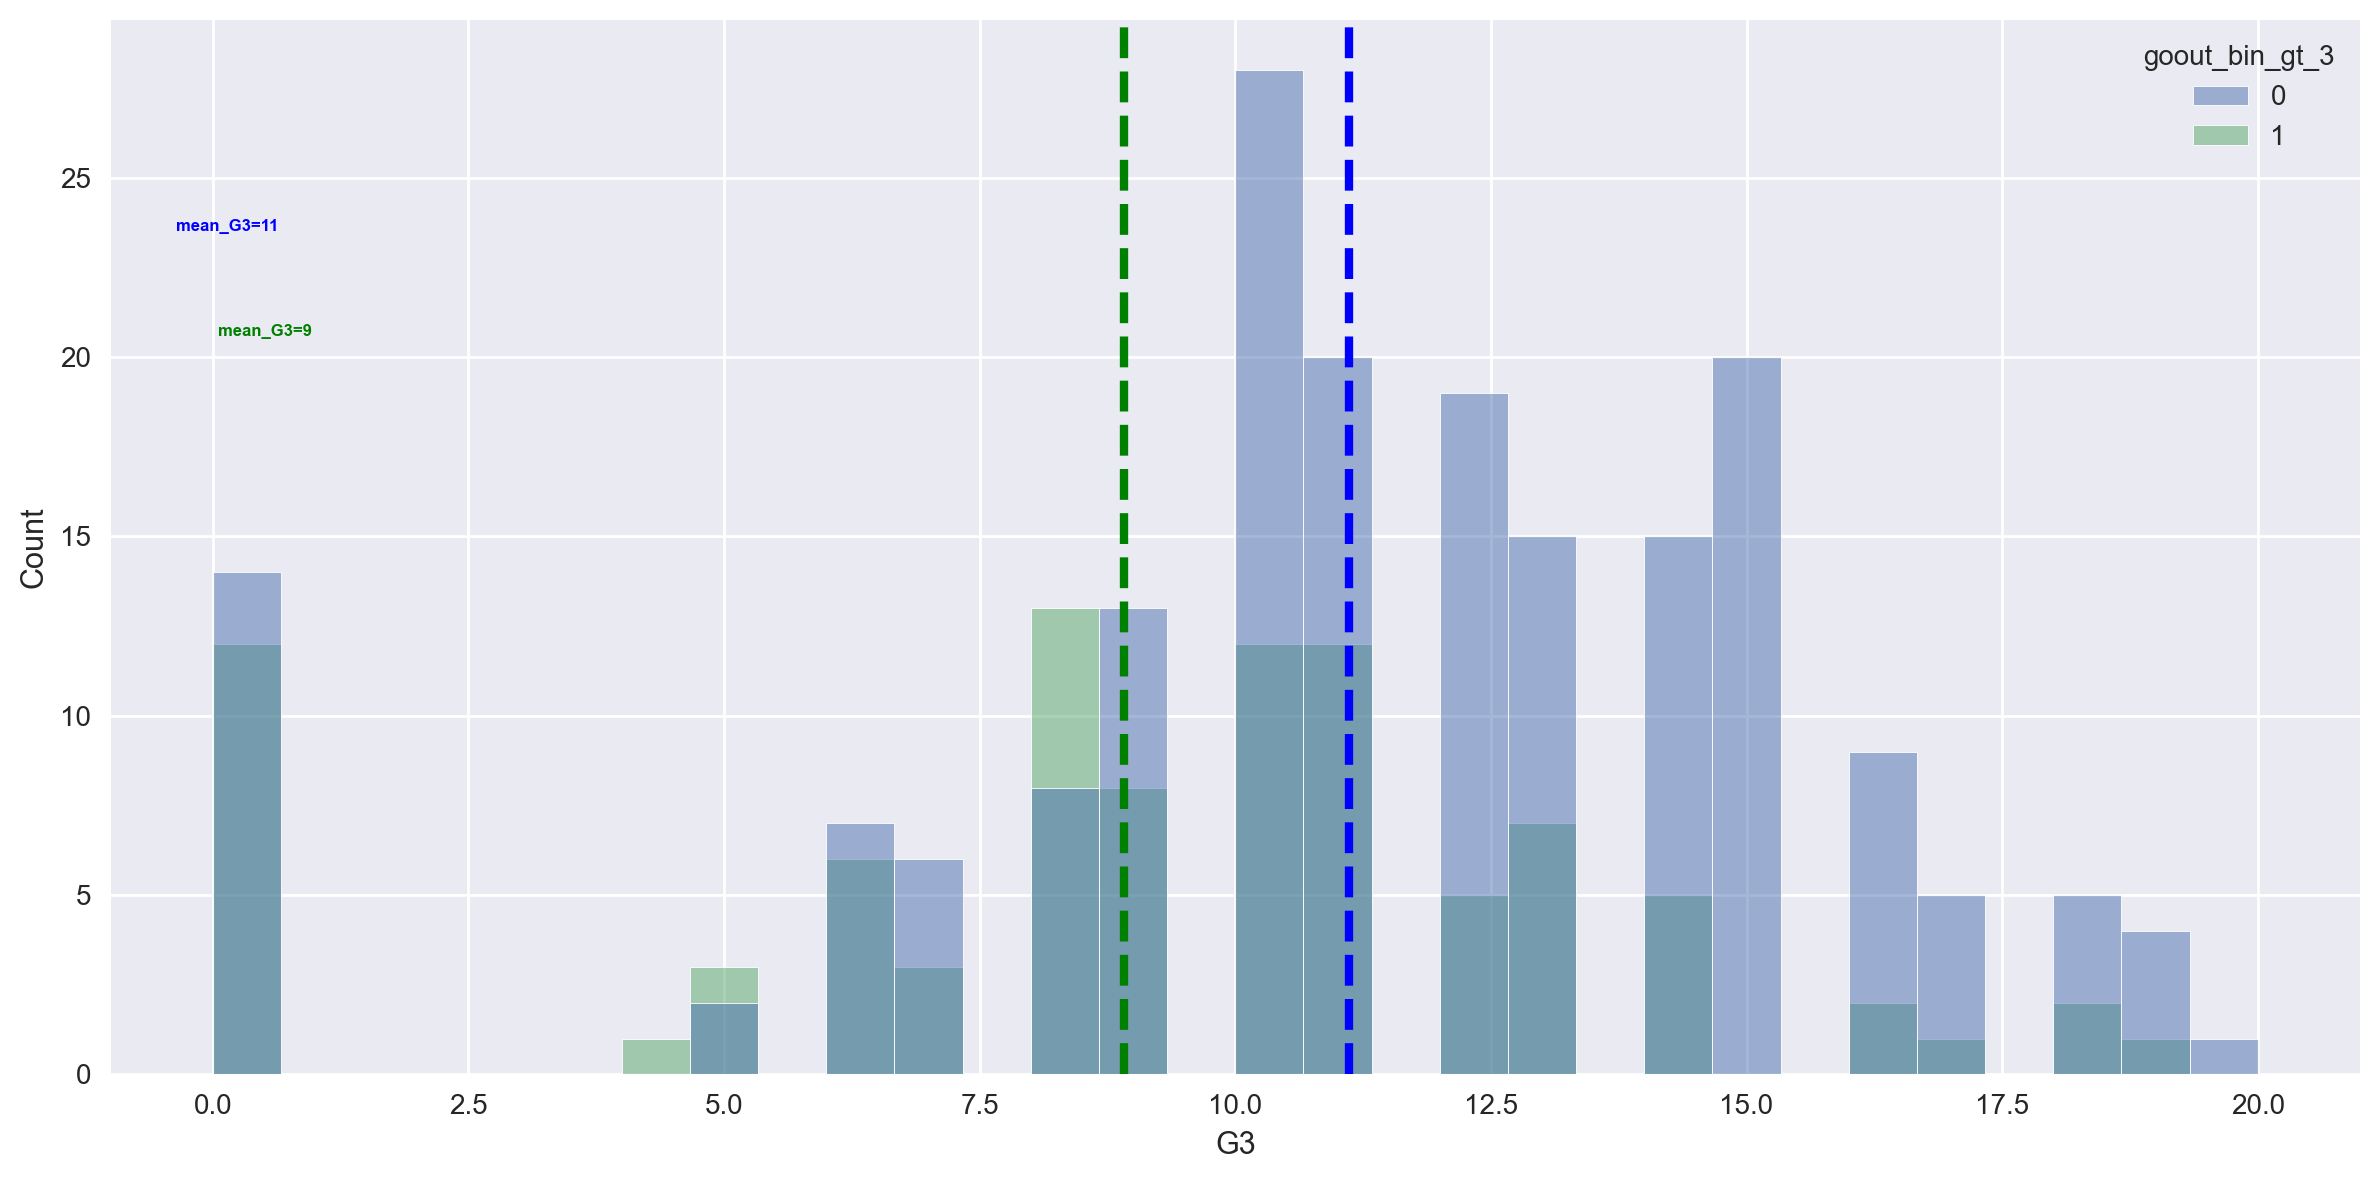

In [65]:
plt.figure(figsize = (12,6))
functions.grafico_hist(df_recodificacion,'G3','goout_bin_gt_3')
plt.tight_layout()

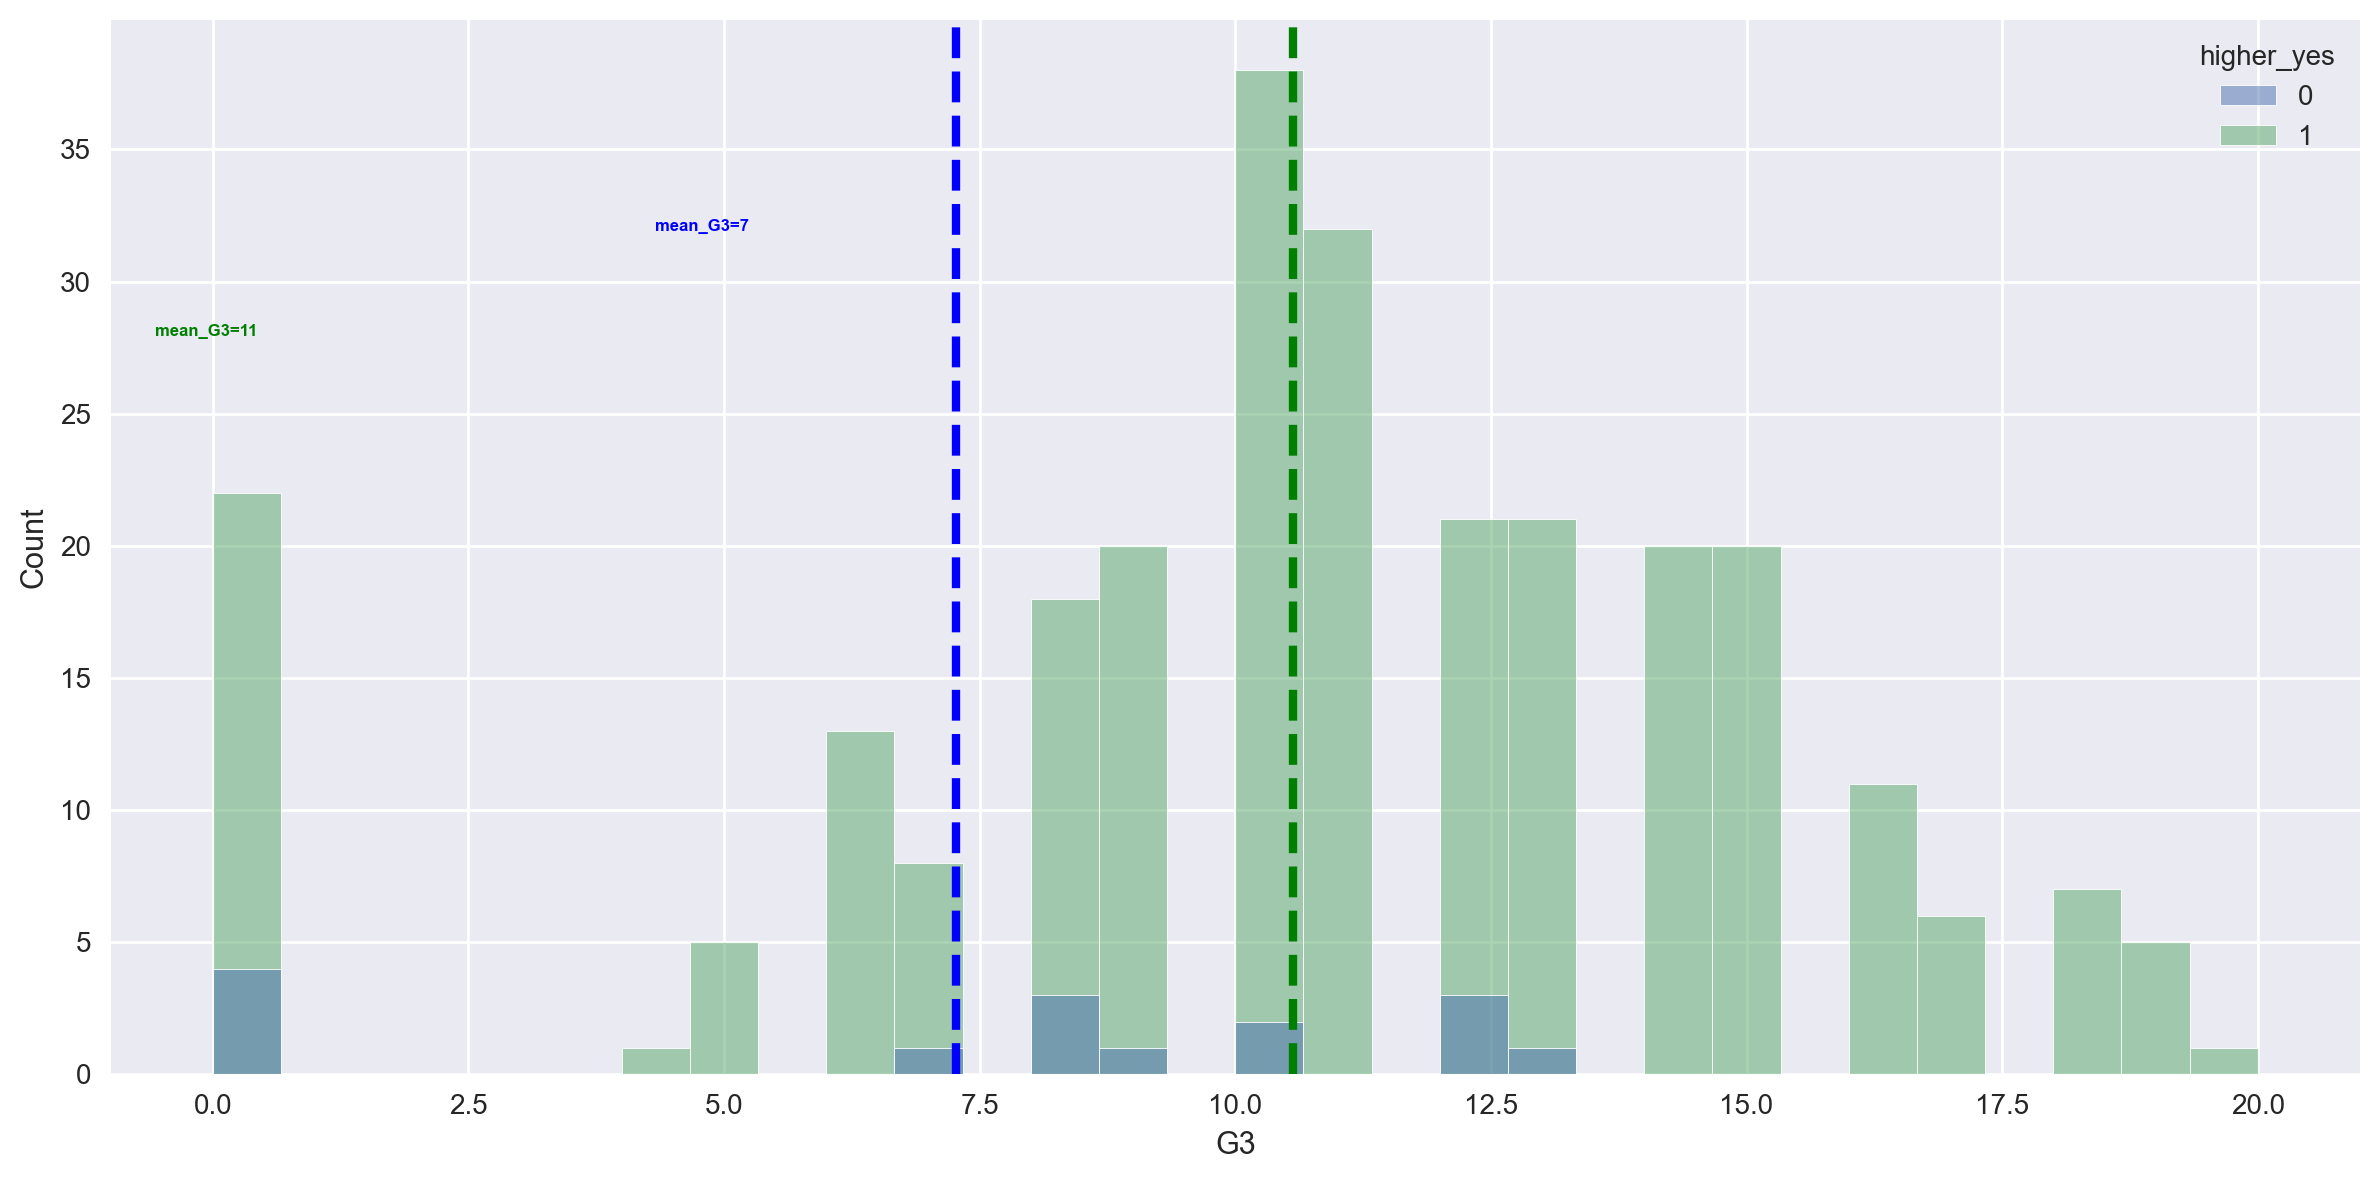

In [66]:
plt.figure(figsize = (12,6))
functions.grafico_hist(df_recodificacion,'G3','higher_yes')
plt.tight_layout()

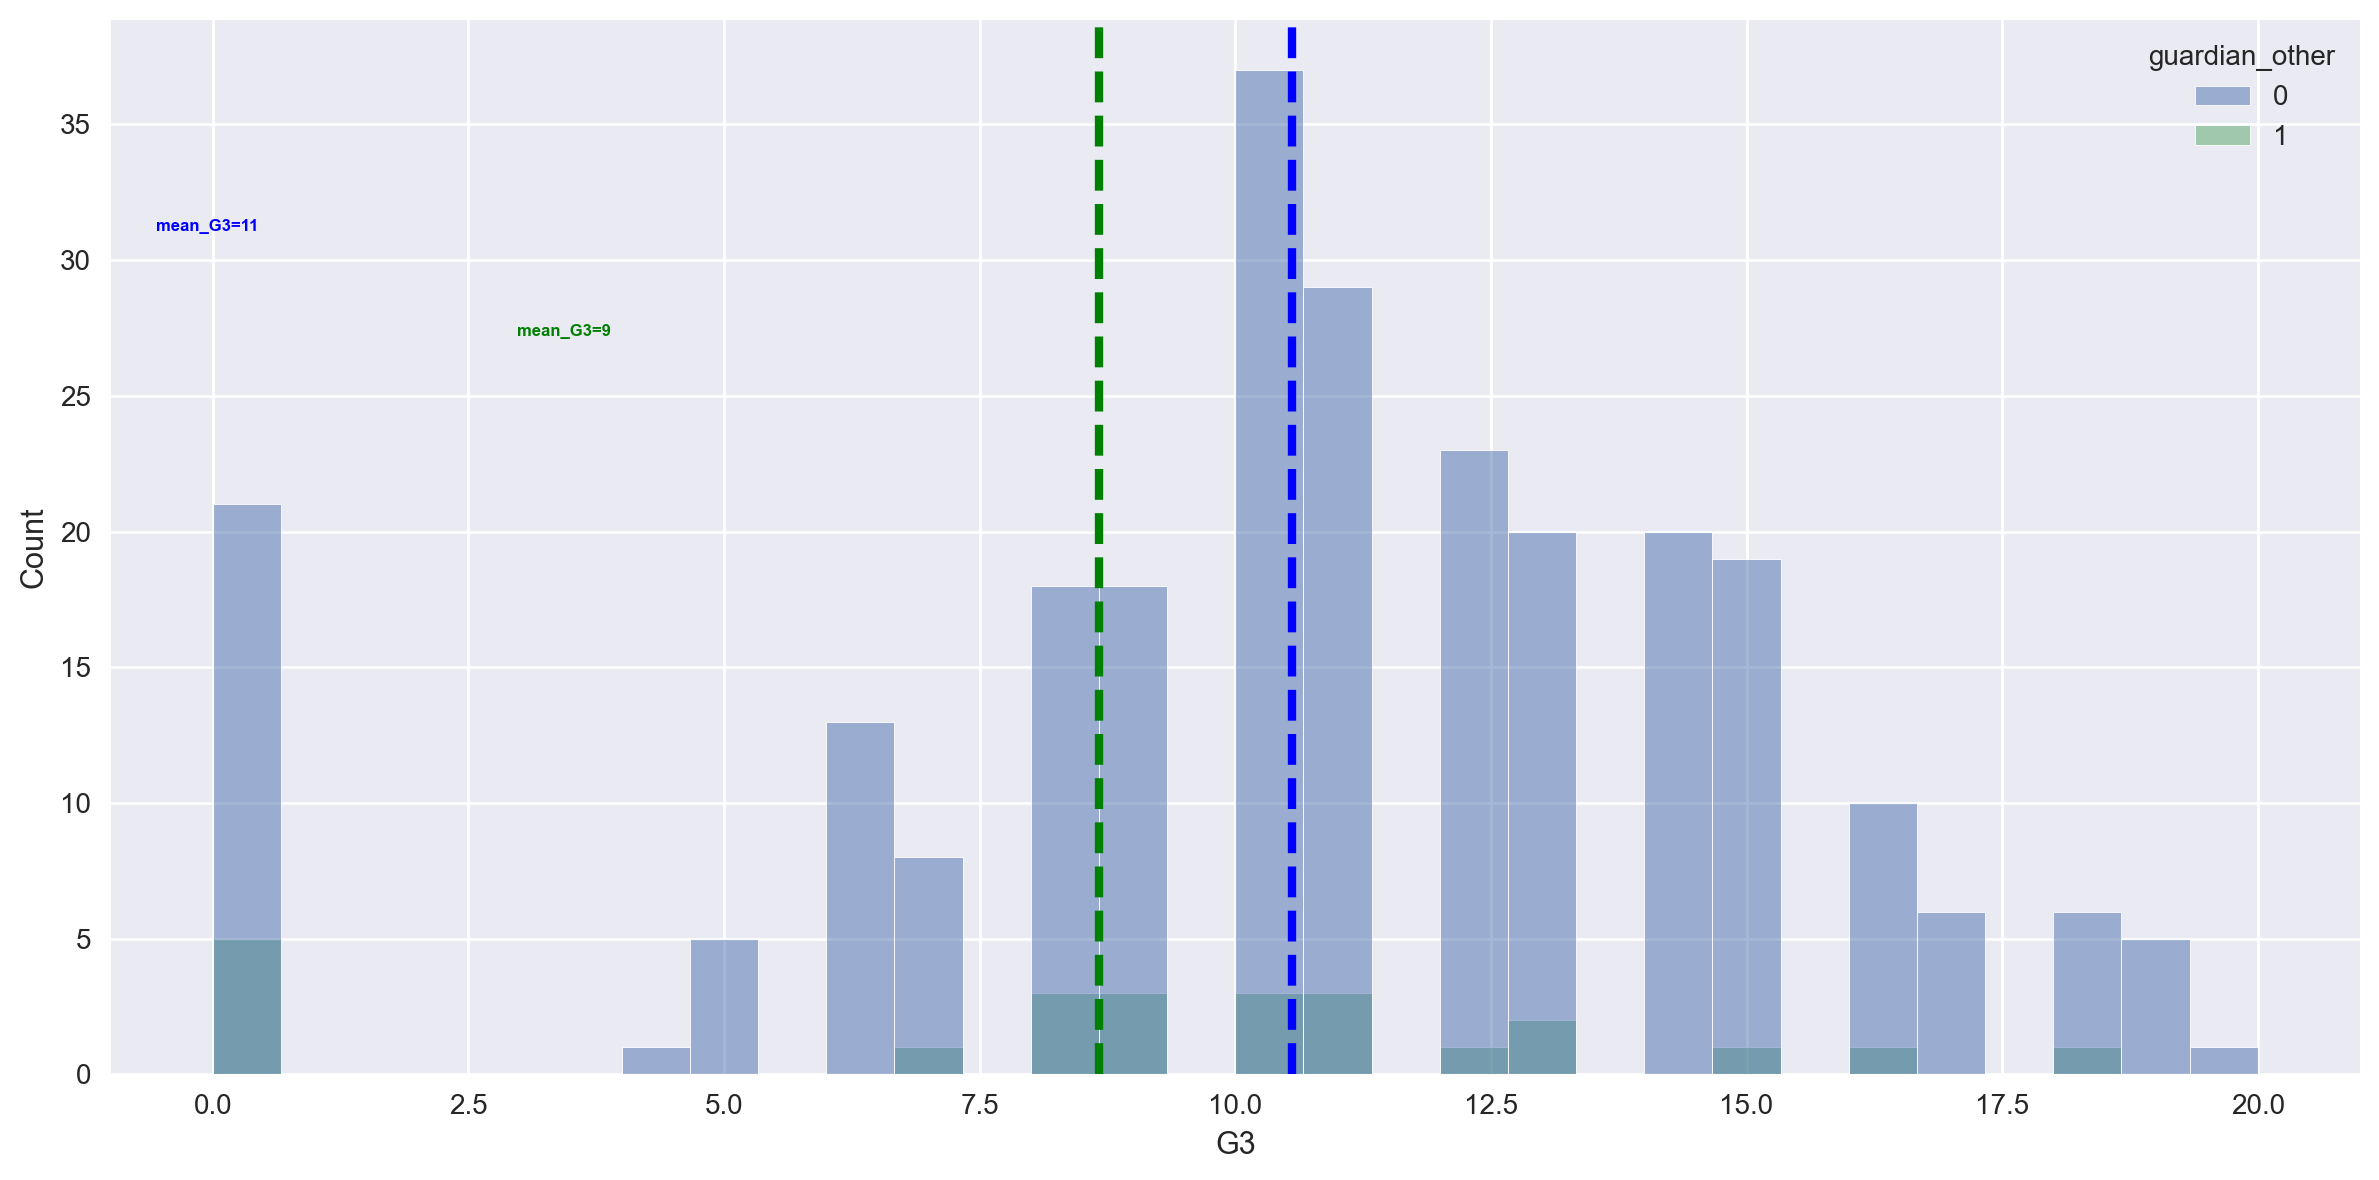

In [67]:
plt.figure(figsize = (12,6))
functions.grafico_hist(df_recodificacion,'G3','guardian_other')
plt.tight_layout()

<Figure size 2400x1200 with 0 Axes>

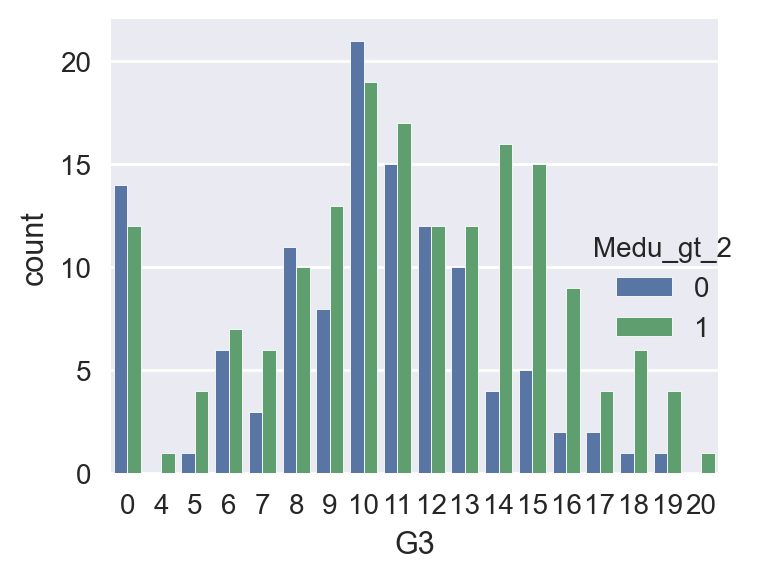

In [68]:
plt.figure(figsize = (12,6))
sns.catplot(data=df_recodificacion,kind='count', x="G3", hue="Medu_gt_2",height=3)
plt.tight_layout()

* Los alumnos que no tienen interés por ir a la educación superior, tienen una diferencia de 4 puntos en G3, que si parece ser substancial.
* Podemos observar que la cantidad de materias reprobadas mayor a 0, está sujeta de manera substancial al grupo peor clasificado de G3, tienen una diferencia de 3 puntos en G3
* Podemos observar que los alumnos que salen mucho con sus amigos(puntajes de 4 y 5) tienen una diferencia de 3 puntos con respecto a los que no lo hacen, que no es tan substancial como los que desean ir a la educación superior pero si es significativo a la hora de medir los peores puntajes, marcando una tendencia más clara incluso que failures.
* Es impresionante contemplar que, la educación de la madre en el cuartil superior de G3 tiene una proporción tan importante.

### Analisis G1

In [69]:
def grafico_hist(df,var,binarize):
    plt.figure(figsize = (20,10))
    g = sns.histplot(data=df,x=var, hue=binarize,bins=30)
    ax = plt.gca()
    ax.axvline(df[df[binarize]==1][var].mean(),color='green',lw=3,ls='--')
    ax.text(df[df[binarize]==1][var].mean()/df[df[binarize]==1][var].count()/2, 0.7, f"mean_{var}={df[df[binarize]==1][var].mean():.0f} ",transform=ax.transAxes,color='green',fontweight='bold',fontsize=20)

    ax.axvline(df[df[binarize]==0][var].mean(),color='blue',lw=3,ls='--')
    ax.text(df[df[binarize]==0][var].mean()/df[df[binarize]==0][var].count()/2, 0.8, f"mean_{var}={df[df[binarize]==0][var].mean():.0f} ",transform=ax.transAxes,color='blue',fontweight='bold',fontsize=20)

<Figure size 4000x2000 with 0 Axes>

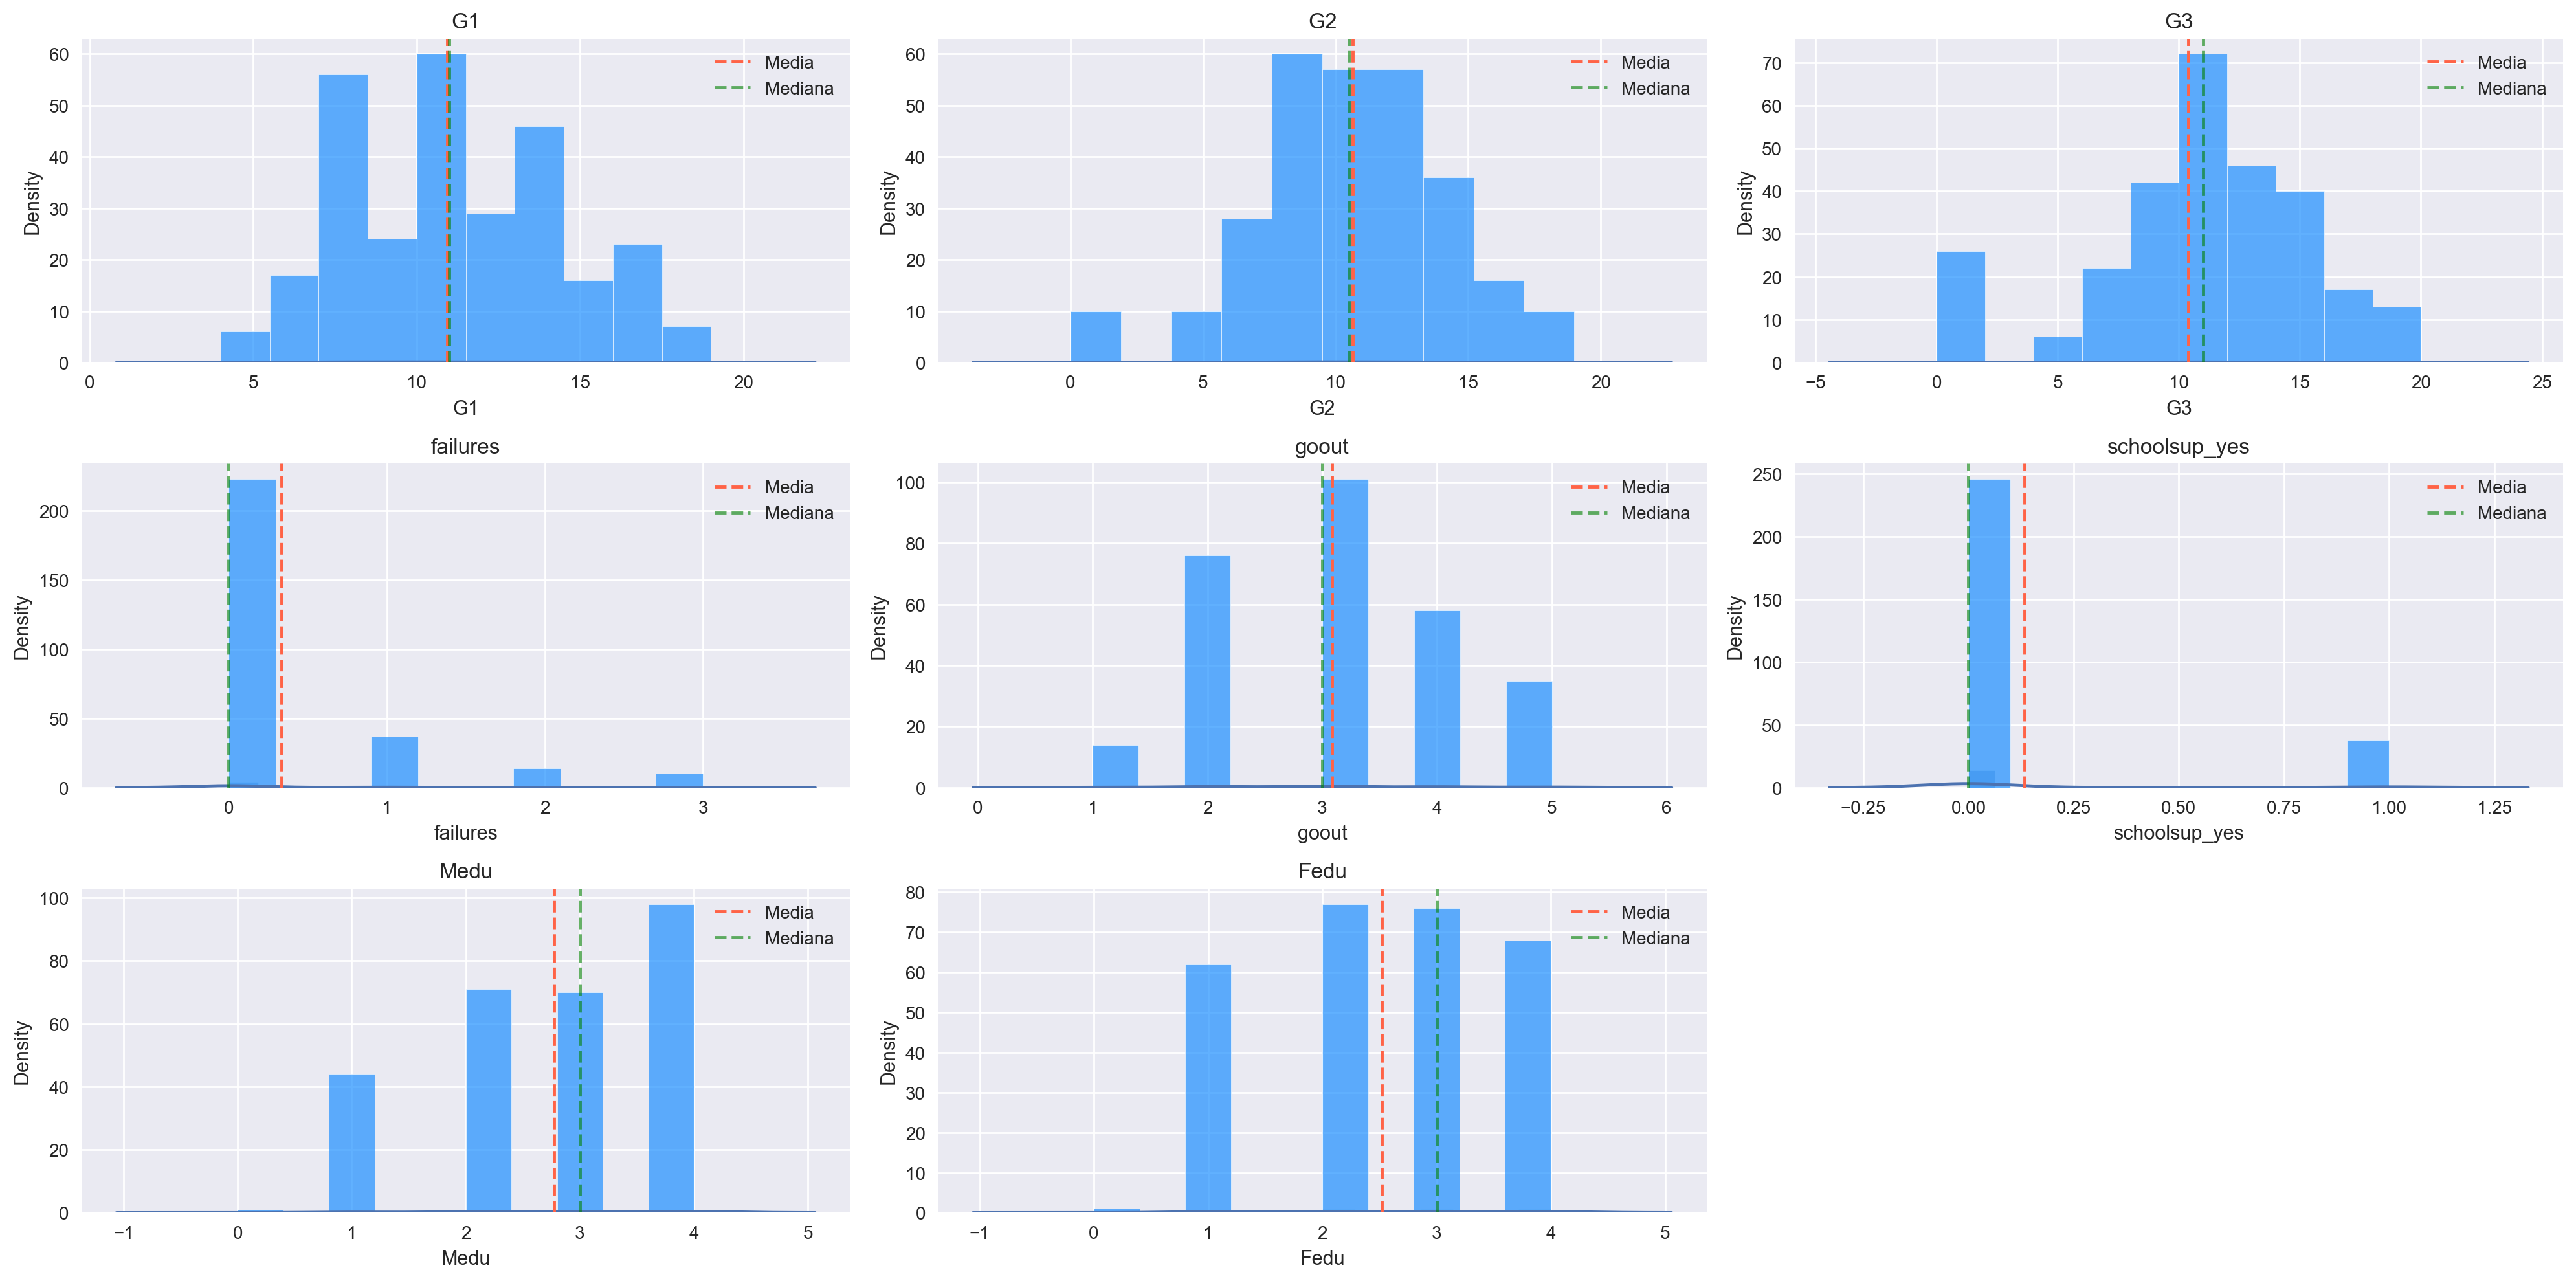

In [70]:
plt.figure(figsize = (20,10))
functions.plot_hist(df_recodificacion, ['G1','G2','G3', 'failures', 'goout', 'schoolsup_yes','Medu', 'Fedu'])
plt.tight_layout()

* Podemos observar en G1, G2 y G3 que a medida que pasa el tiempo, los alumnos con mala calificación se acrecentan criticamente

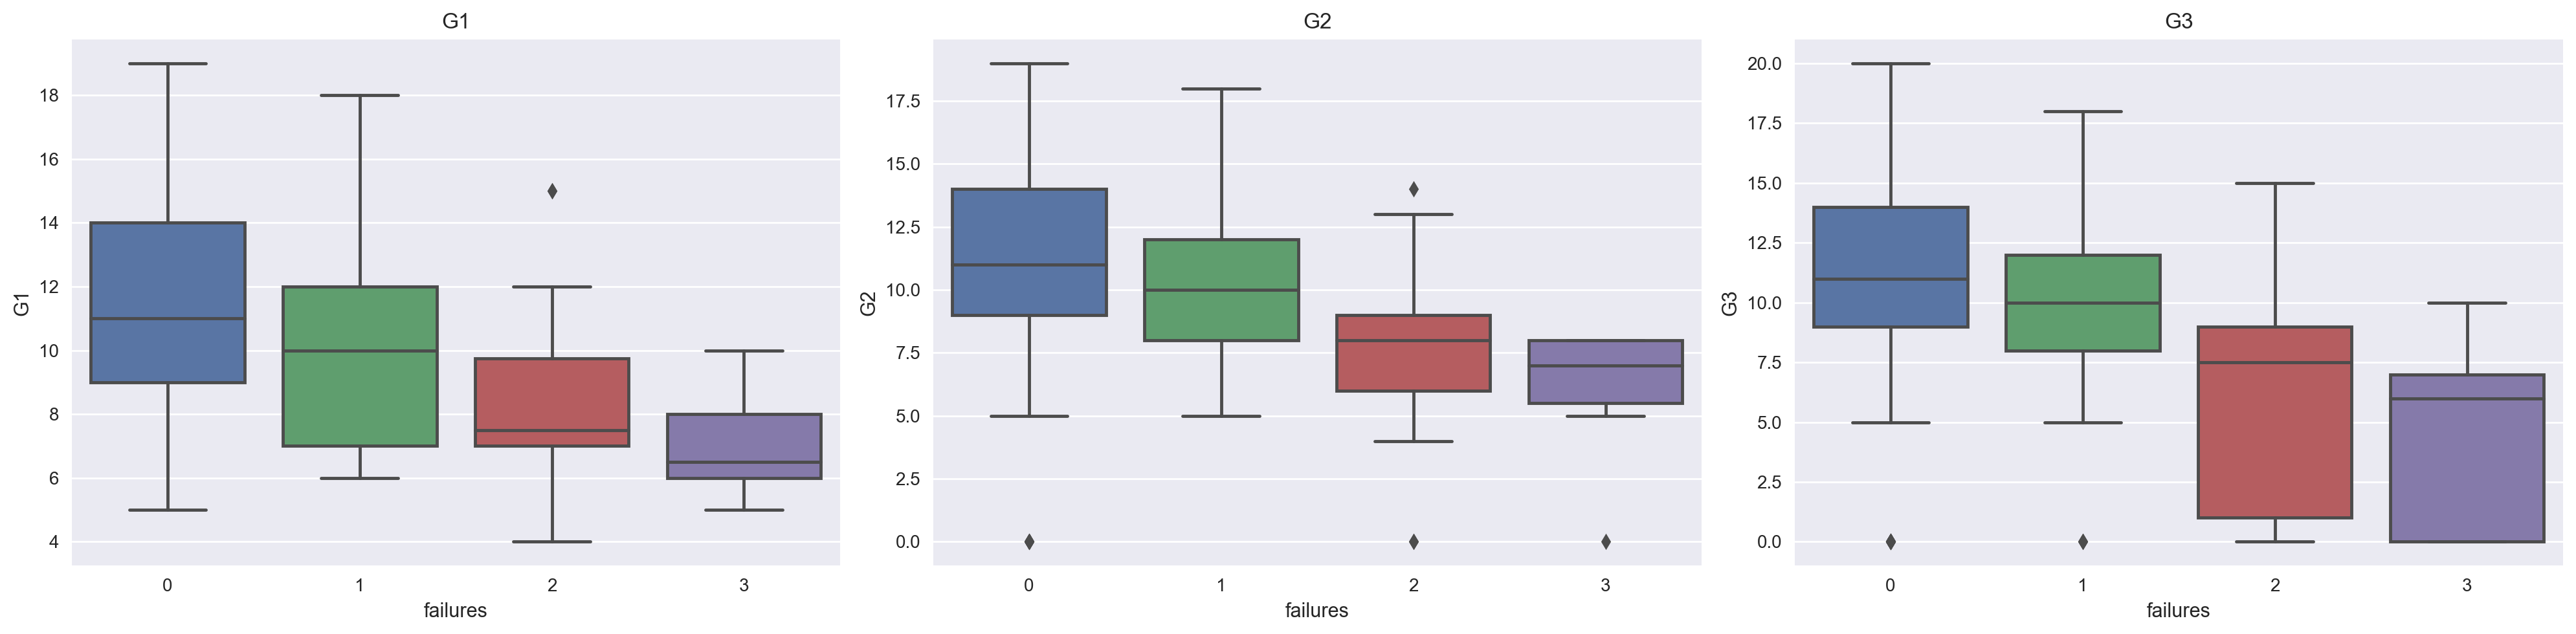

In [71]:
plt.figure(figsize = (20,5))
for index, column in enumerate(['G1', 'G2', 'G3']):
    
    plt.subplot(1,3,index+1)
    plt.title(column)
    sns.boxplot('failures',column, data = df_recodificacion)
    
    
plt.tight_layout()

* Podemos observar que a medida que avanza el año, en G3 los failures llegan a niveles críticos

* Podemos observar una fuerte correlación entre las notas de (G1, G2) y (G2 y G3)

## Hito 3:

Completar el punto de Modelación descriptiva.
* Elementos a considerar en éste hito:
    * La modelación mediante regresión de ambos problemas. (2 puntos)
    * La interpretación de los principales regresores en cada problema. (2 puntos)
    * La definición de las estrategias de Modelación predictiva. (1 punto)

### Modelo descriptivo para  G1

Se busca definir cuales son las principales determinantes del estudio. Gracias a este trabajo se podrá construir o depurar el modelo predictivo.

Genereraremos un modelo de regresión lineal para la variable G1, excluyendo G2 y G3-

- Se puede observar que para este modelo tenemos un R-squared de 33.5% con un R ajustado de 21.9%, no obstante el modelo es significativo dado que la Prob F-statistic es menor a 0.05 y existe evidencia que hay al menos un coeficiente distinto de 0.

In [142]:
modelo_g1 = smf.ols(f"G1 ~ {' + '.join(df_bin.drop(['G1','G2', 'G3','goout_bin_gt_3','Medu_gt_2','failures_bin'], axis = 1).columns.tolist())}", df_bin).fit()
modelo_g1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.224   
Dependent Variable: G1               AIC:                770.9651
Date:               2022-09-25 22:30 BIC:                916.9241
No. Observations:   284              Log-Likelihood:     -345.48 
Df Model:           39               F-statistic:        3.090   
Df Residuals:       244              Prob (F-statistic): 5.75e-08
R-squared:          0.331            Scale:              0.77639 
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
Intercept          0.1789   0.5488  0.3261 0.7446 -0.9019  1.2598
age                0.0301   0.0722  0.4177 0.6765 -0.1120  0.1723
Medu               0.0602   0.0938  0.6421 0.5214 -0.1245  0.2450
Fedu               0.0506   0.0784  0.6463 0.5187 -0.1037  0.2050
traveltime        -0.0045   0.0615 -0.0738 0.9412 -0.1256  0.1166
studytime          0.1301   0.0629  2.0678 0.0397  0.0062  0.2540
failures          -0.2497   0.0628 -3.9771 0.0001 -0.3734 -0.1260
absences          -0.0119   0.0605 -0.1960 0.8448 -0.1311  0.1074
famrel             0.0388   0.0571  0.6806 0.4968 -0.0736  0.1513
freetime           0.1173   0.0599  1.9593 0.0512 -0.0006  0.2352
goout             -0.2517   0.0650 -3.8728 0.0001 -0.3798 -0.1237
Dalc              -0.0195   0.0764 -0.2553 0.7987 -0.1701  0.1310
Walc               0.0620   0.0820  0.7557 0.4506 -0.0995  0.2235
health            -0.1170   0.0568 -2.0620 0.0403 -0.2288 -0.0052
school_MS         -0.1182   0.2026 -0.5832 0.5603 -0.5173  0.2809
sex_M              0.2320   0.1312  1.7680 0.0783 -0.0265  0.4905
address_U          0.0062   0.1480  0.0422 0.9664 -0.2854  0.2978
famsize_LE3        0.0950   0.1338  0.7099 0.4784 -0.1686  0.3586
Pstatus_T         -0.0569   0.1977 -0.2879 0.7737 -0.4464  0.3326
schoolsup_yes     -0.5393   0.1715 -3.1453 0.0019 -0.8770 -0.2015
famsup_yes        -0.3059   0.1250 -2.4468 0.0151 -0.5521 -0.0596
paid_yes           0.0098   0.1225  0.0797 0.9365 -0.2316  0.2511
activities_yes    -0.1435   0.1125 -1.2755 0.2033 -0.3651  0.0781
nursery_yes       -0.0077   0.1384 -0.0560 0.9554 -0.2803  0.2648
higher_yes         0.3368   0.2663  1.2648 0.2072 -0.1877  0.8612
internet_yes       0.0204   0.1525  0.1337 0.8937 -0.2800  0.3208
romantic_yes      -0.0256   0.1213 -0.2112 0.8329 -0.2645  0.2133
Mjob_health        0.3117   0.2792  1.1161 0.2655 -0.2384  0.8617
Mjob_other        -0.1649   0.1818 -0.9067 0.3654 -0.5230  0.1933
Mjob_services      0.1190   0.2054  0.5792 0.5630 -0.2856  0.5235
Mjob_teacher      -0.3299   0.2541 -1.2981 0.1955 -0.8304  0.1707
Fjob_health       -0.3214   0.3966 -0.8105 0.4184 -1.1025  0.4597
Fjob_other        -0.4489   0.2992 -1.5001 0.1349 -1.0383  0.1405
Fjob_services     -0.2591   0.3008 -0.8614 0.3899 -0.8517  0.3334
Fjob_teacher       0.2483   0.3637  0.6827 0.4955 -0.4681  0.9647
reason_home        0.1125   0.1437  0.7832 0.4343 -0.1705  0.3955
reason_other       0.0306   0.2054  0.1488 0.8819 -0.3739  0.4350
reason_reputation  0.1615   0.1482  1.0900 0.2768 -0.1304  0.4533
guardian_mother    0.0634   0.1455  0.4360 0.6632 -0.2232  0.3501
guardian_other     0.0902   0.2584  0.3491 0.7273 -0.4188  0.5992
-----------------------------------------------------------------
Omnibus:              6.431        Durbin-Watson:           2.003
Prob(Omnibus):        0.040        Jarque-Bera (JB):        4.178
Skew:                 0.128        Prob(JB):                0.124
Kurtosis:             2.464        Condition No.:           38   
=================================================================

"""

#### Mejores predictores para G1 Iteración 1

In [137]:
mvd = modelo_g1.summary2().tables[1]
mvd[mvd['P>|t|'] < 0.025].round(3).sort_values(by='P>|t|', ascending=True).reset_index()

index  Coef.  Std.Err.      t  P>|t|  [0.025  0.975]
0       failures -0.250     0.063 -3.977  0.000  -0.373  -0.126
1          goout -0.252     0.065 -3.873  0.000  -0.380  -0.124
2  schoolsup_yes -0.539     0.171 -3.145  0.002  -0.877  -0.202
3     famsup_yes -0.306     0.125 -2.447  0.015  -0.552  -0.060

#### Iteración para G1

- A continuación depuraremos el modelo, dejando solo aquellos regresores con un pvalue menor o igual a .05

In [138]:
depuracion_g1 = modelo_g1.pvalues[modelo_g1.pvalues <= 0.025].index.tolist()
modelo_g1_dep = smf.ols(f"G1 ~ {' + '.join(depuracion_g1)}", df_bin).fit()
modelo_g1_dep.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.180   
Dependent Variable: G1               AIC:                754.4575
Date:               2022-09-25 22:28 BIC:                772.7023
No. Observations:   284              Log-Likelihood:     -372.23 
Df Model:           4                F-statistic:        16.56   
Df Residuals:       279              Prob (F-statistic): 3.45e-12
R-squared:          0.192            Scale:              0.81973 
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
Intercept          0.1886   0.0871  2.1647 0.0313  0.0171  0.3601
failures          -0.2993   0.0546 -5.4815 0.0000 -0.4068 -0.1918
goout             -0.1884   0.0546 -3.4466 0.0007 -0.2959 -0.0808
schoolsup_yes     -0.5923   0.1597 -3.7097 0.0003 -0.9066 -0.2780
famsup_yes        -0.1785   0.1115 -1.6011 0.1105 -0.3980  0.0410
-----------------------------------------------------------------
Omnibus:              6.832        Durbin-Watson:           1.976
Prob(Omnibus):        0.033        Jarque-Bera (JB):        5.013
Skew:                 0.202        Prob(JB):                0.082
Kurtosis:             2.490        Condition No.:           4    
=================================================================

"""

* **Podemos observar que la capacidad explicativa de nuestras VI de:**
    * Failures
    * Goout
    * Schoolsup_yes
    * Famsup_yes
* **es de un Adj. R-squared = 19.1%**
* **Pero también podemos observar que las famsup_yes aumentaron su p-value por lo que procederemos a iterar nuevamente el modelo sin estas variables**

#### Segunda iteración para G1

In [143]:
segunda_depuracion_g1 = modelo_g1_dep.pvalues[(modelo_g1_dep.pvalues <= 0.025) & (modelo_g1_dep.pvalues.index !='Intercept')].index.tolist()
modelo_g1_2dep = smf.ols(f"G1 ~ {' + '.join(segunda_depuracion_g1)}", df_bin).fit()
modelo_g1_2dep.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.176   
Dependent Variable: G1               AIC:                755.0549
Date:               2022-09-25 22:31 BIC:                769.6508
No. Observations:   284              Log-Likelihood:     -373.53 
Df Model:           3                F-statistic:        21.11   
Df Residuals:       280              Prob (F-statistic): 2.35e-12
R-squared:          0.184            Scale:              0.82430 
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
Intercept          0.0841   0.0579  1.4531 0.1473 -0.0298  0.1981
failures          -0.2965   0.0547 -5.4174 0.0000 -0.4043 -0.1888
goout             -0.1885   0.0548 -3.4388 0.0007 -0.2963 -0.0806
schoolsup_yes     -0.6288   0.1585 -3.9679 0.0001 -0.9407 -0.3168
-----------------------------------------------------------------
Omnibus:              6.521        Durbin-Watson:           2.005
Prob(Omnibus):        0.038        Jarque-Bera (JB):        4.998
Skew:                 0.214        Prob(JB):                0.082
Kurtosis:             2.510        Condition No.:           3    
=================================================================

"""

**Observamos que la capacidad predictora del modelo bajó de 19.1% a 17.6% sacando la variable de famsup_yes, ya que ahora ninguna variable tiene un p value alto, dejaremos de iterar y nos quedaremos con las siguientes variables:**
* Failures
* Goout
* Schoolsup_yes

eval_env: 1


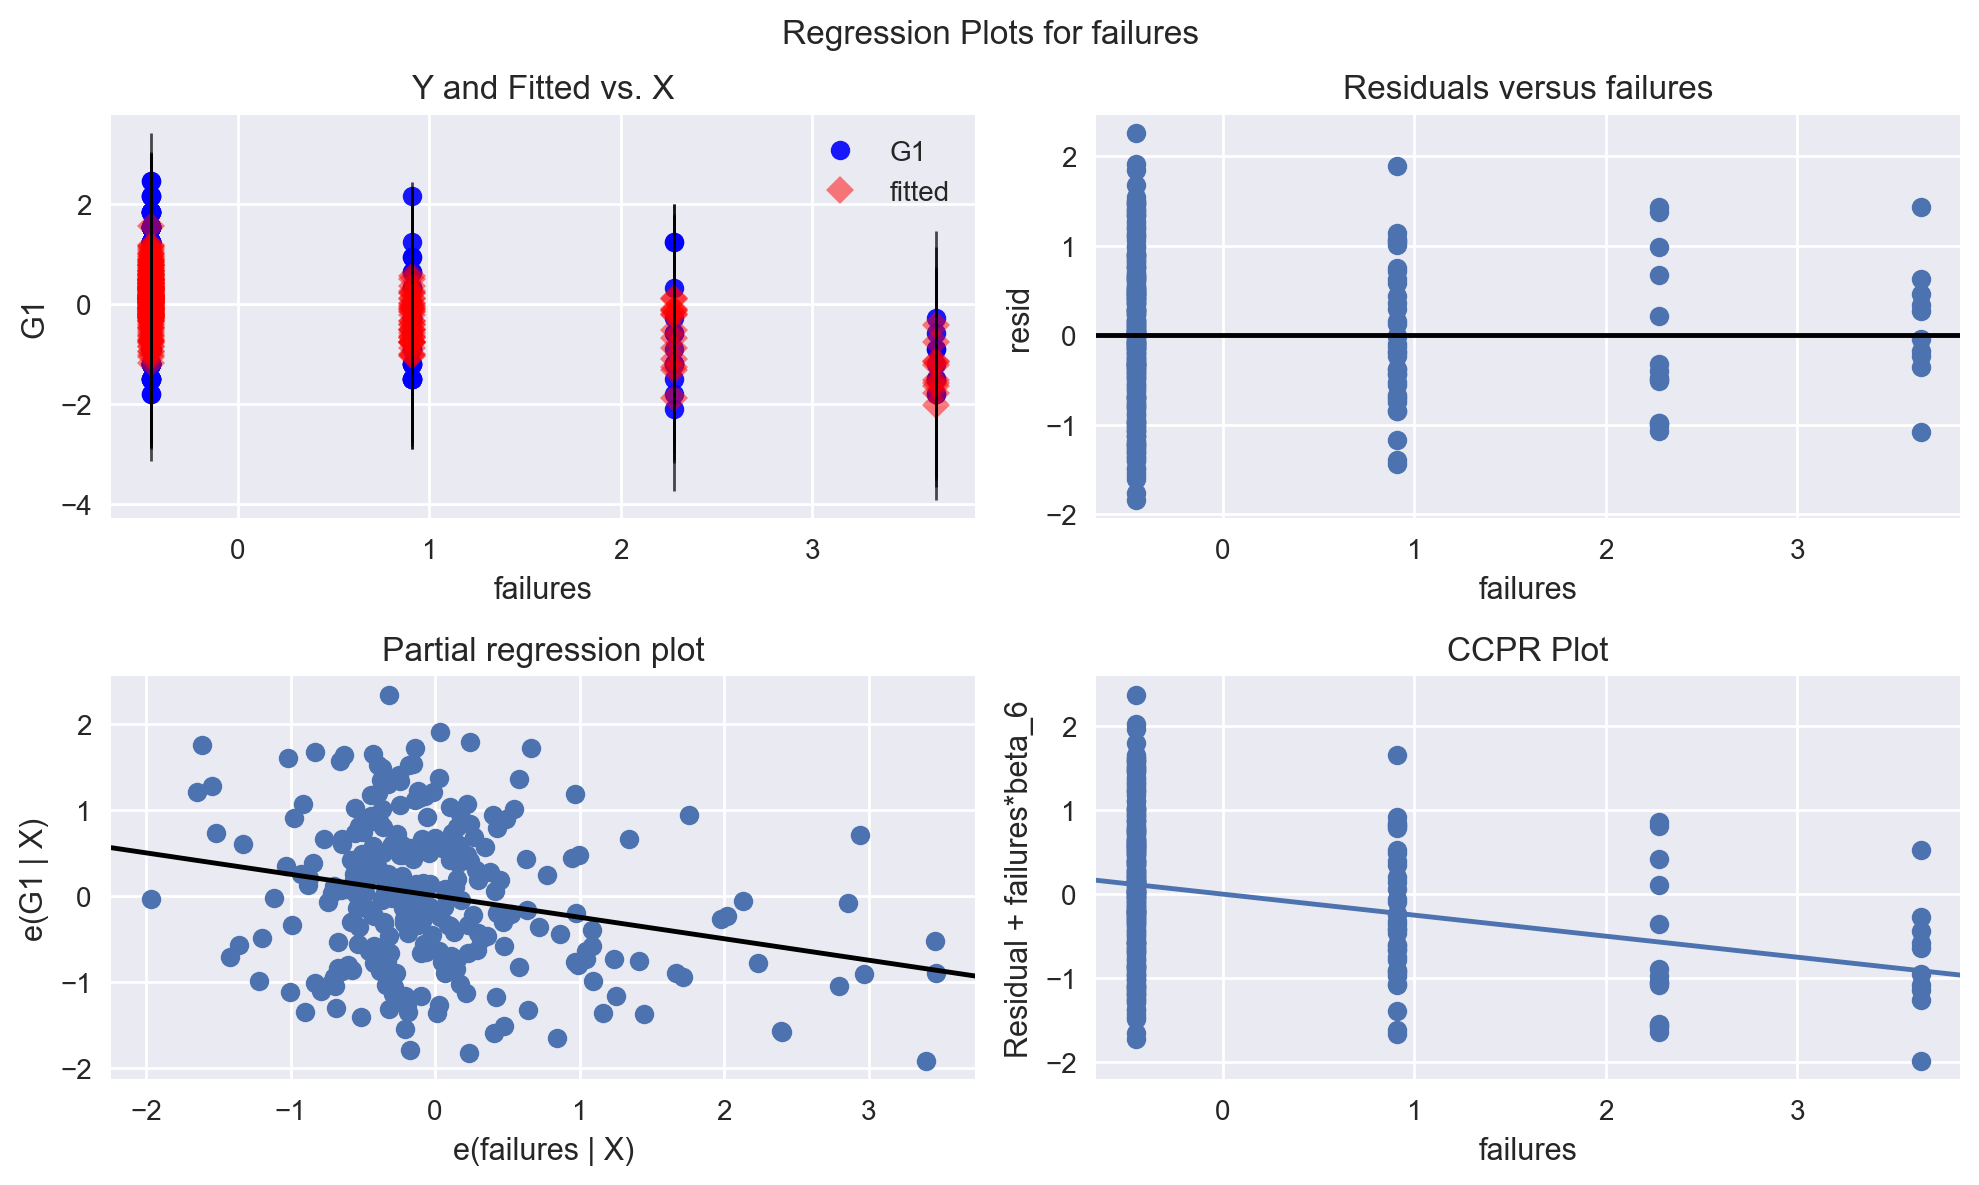

In [119]:
sm.graphics.plot_regress_exog(modelo_g1,'failures');

eval_env: 1


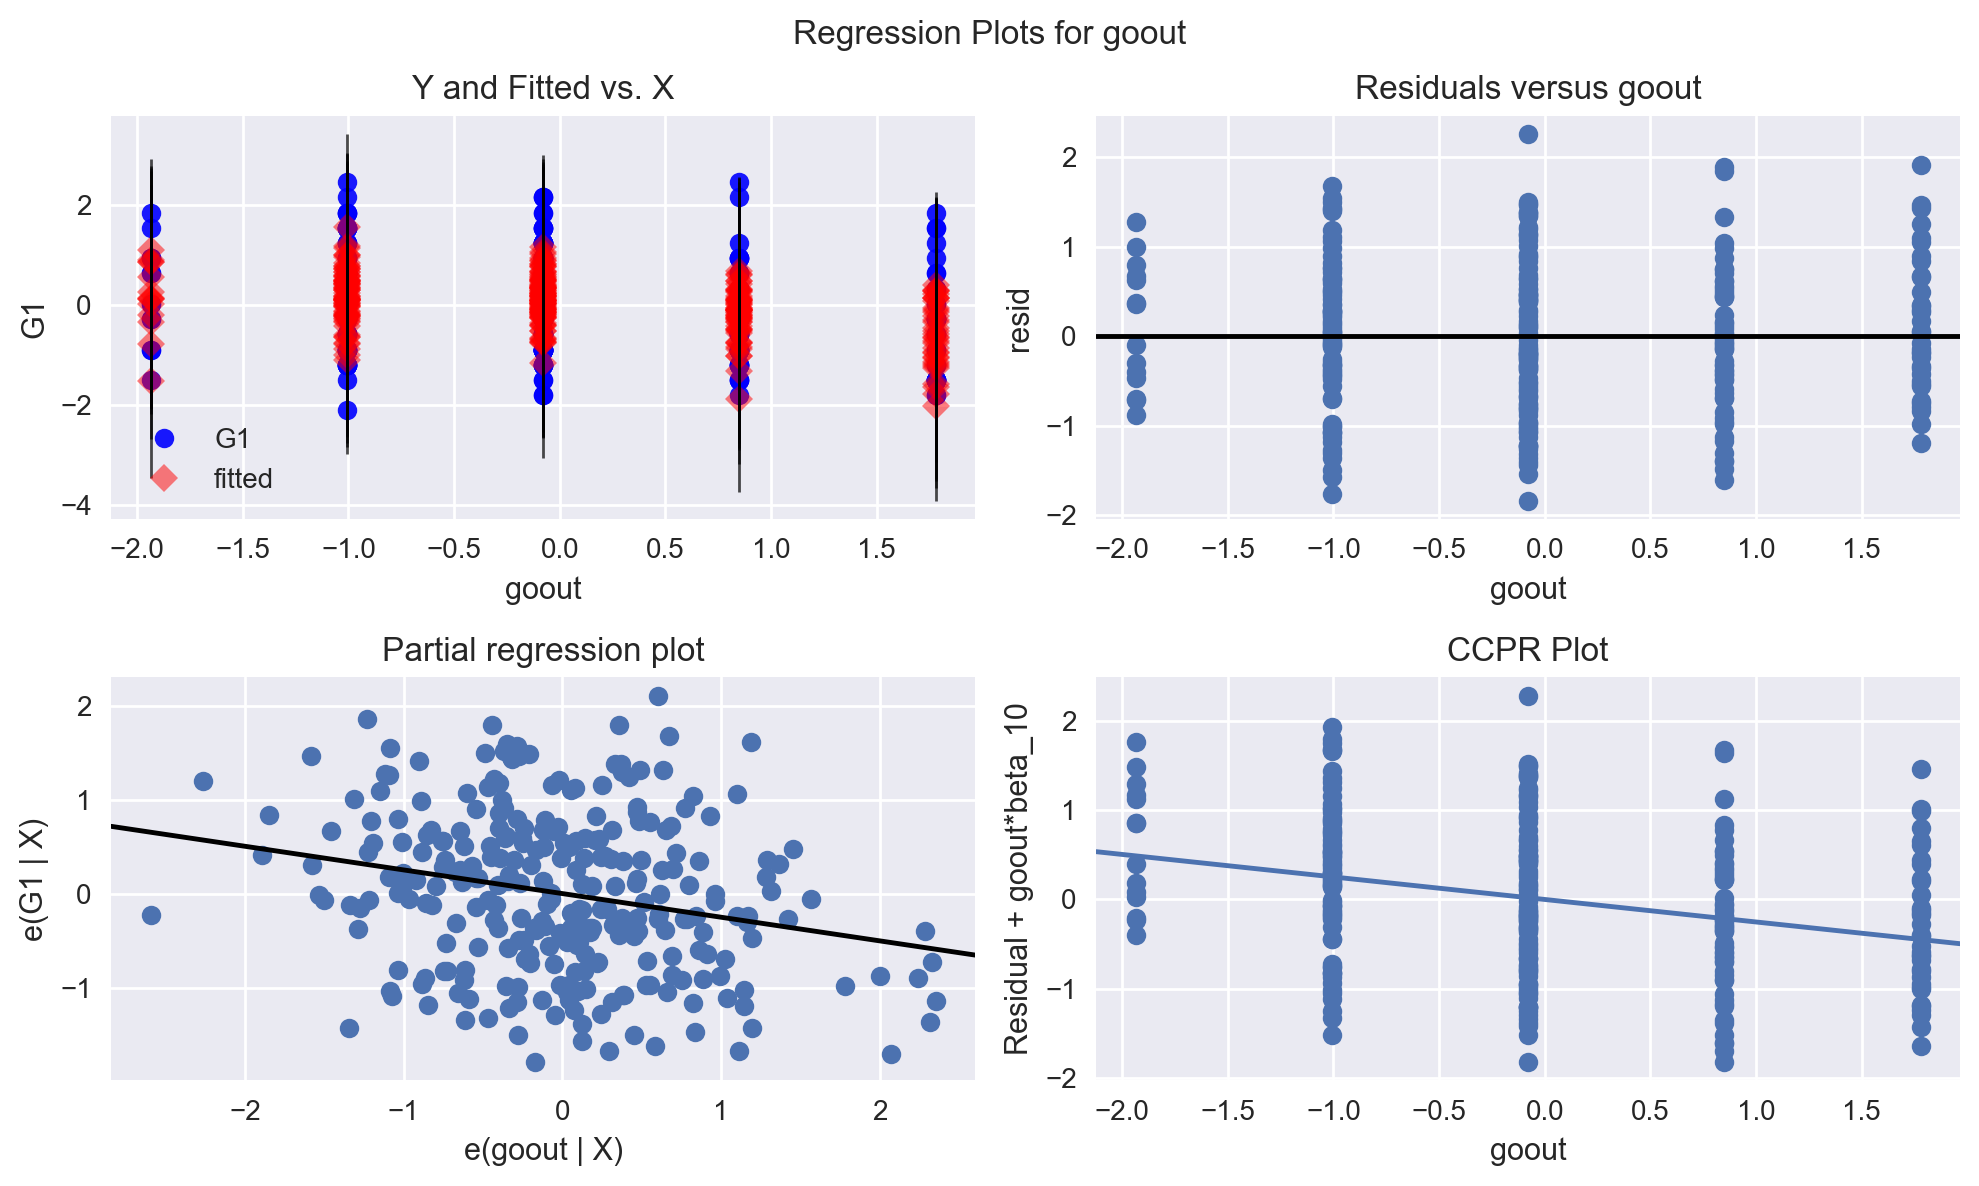

In [120]:
sm.graphics.plot_regress_exog(modelo_g1,'goout');

eval_env: 1


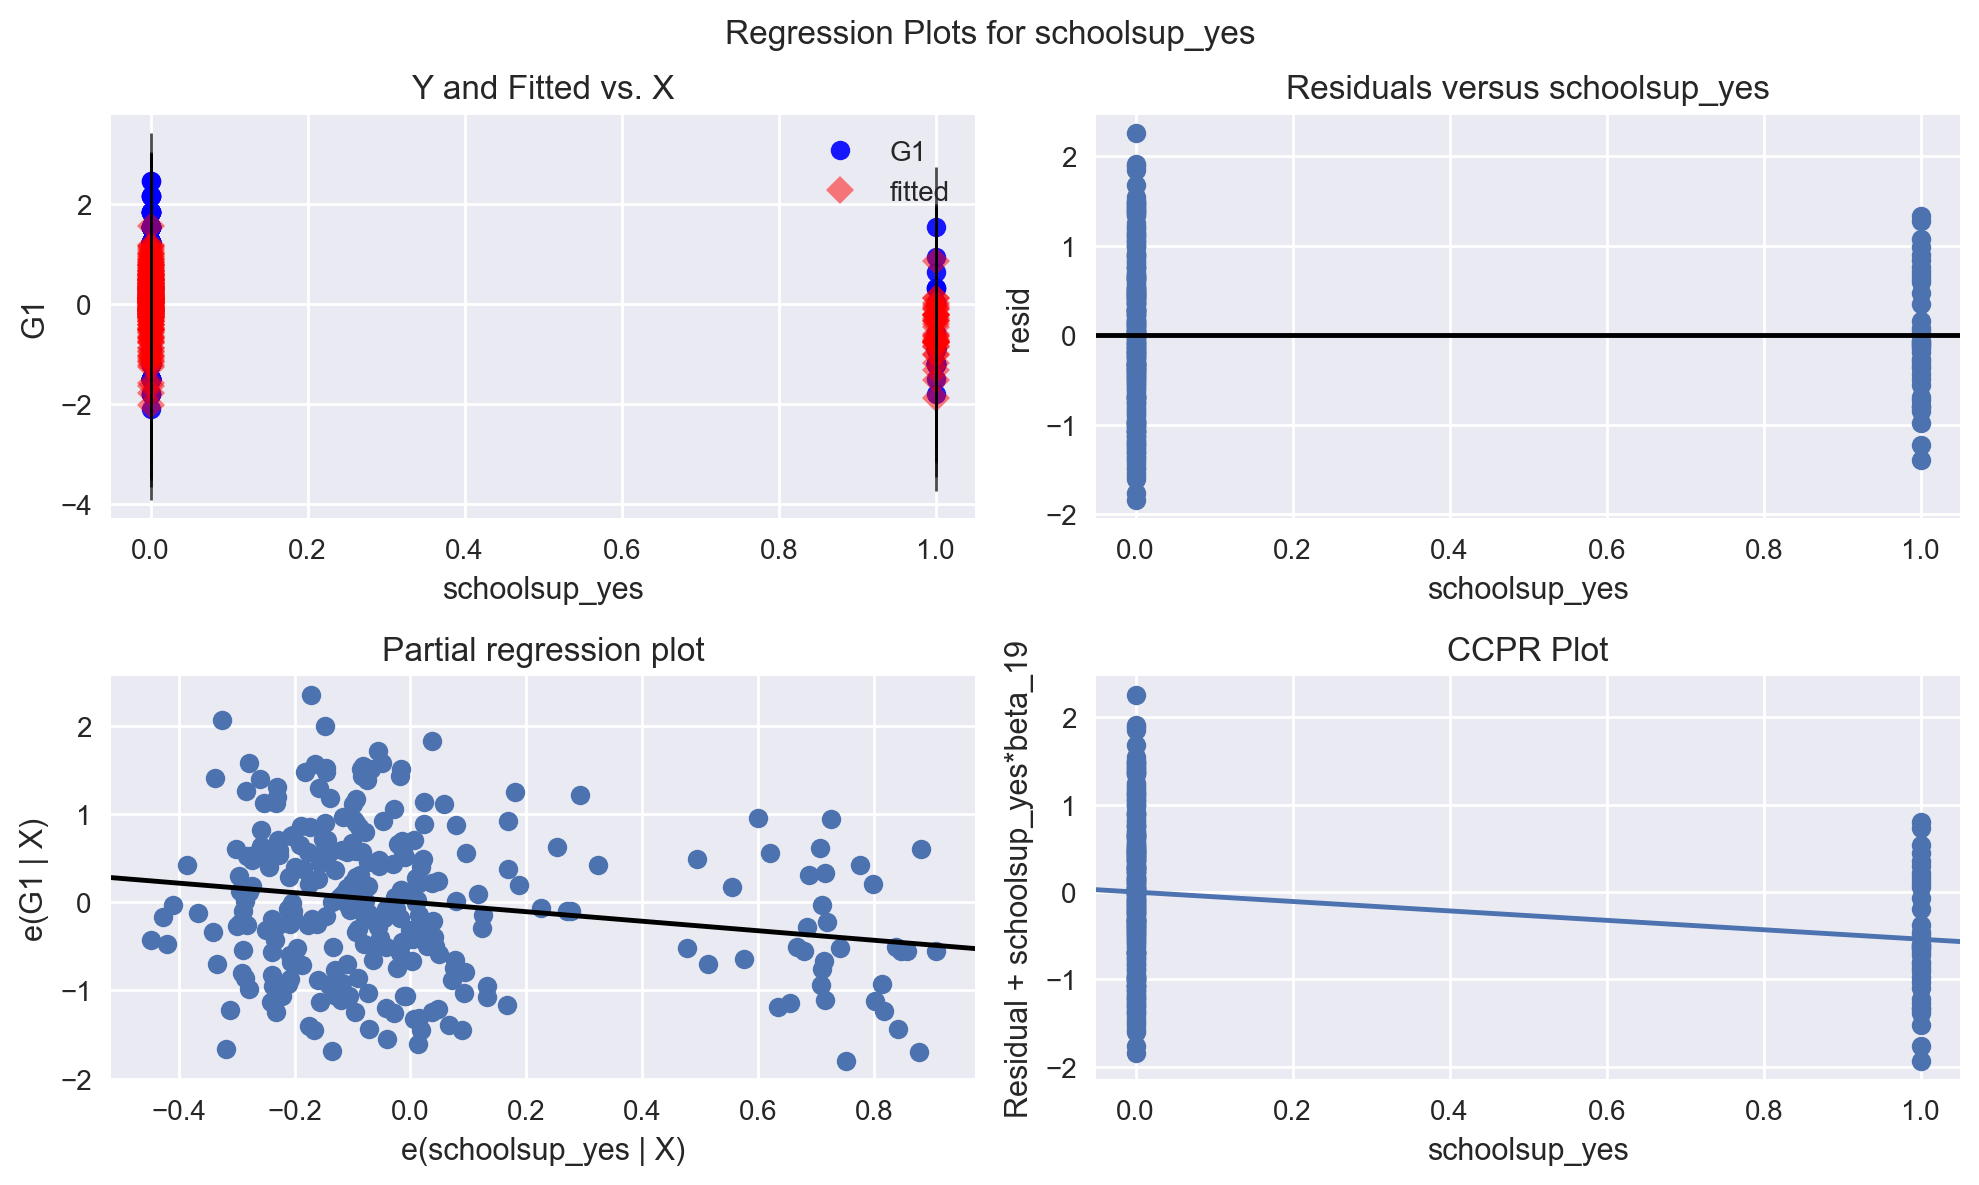

In [121]:
sm.graphics.plot_regress_exog(modelo_g1,'schoolsup_yes');

### Modelo descriptivo para G2

In [75]:
modelo_g2 = smf.ols(f"G2 ~ {' + '.join(df_bin.drop(['G1','G2', 'G3','goout_bin_gt_3','Medu_gt_2','failures_bin'], axis = 1).columns.tolist())}", df_bin).fit()
print("Este modelo saturado para G2, se puede evidencia un R-squared de 30% y adj. R-squared de 18.9%, algo bajo. Sin perjuicio el modelo es significativa dado que el Prob F-statistic es menor a 0.05, por lo que hay evidencia que sostiene que al menos 1 coeficiente es distinto de 0")
modelo_g2.summary2()

Este modelo saturado para G2, se puede evidencia un R-squared de 30% y adj. R-squared de 18.9%, algo bajo. Sin perjuicio el modelo es significativa dado que el Prob F-statistic es menor a 0.05, por lo que hay evidencia que sostiene que al menos 1 coeficiente es distinto de 0


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.189   
Dependent Variable: G2               AIC:                783.2889
Date:               2022-09-25 13:18 BIC:                929.2479
No. Observations:   284              Log-Likelihood:     -351.64 
Df Model:           39               F-statistic:        2.693   
Df Residuals:       244              Prob (F-statistic): 2.14e-06
R-squared:          0.301            Scale:              0.81083 
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -0.3941   0.5608 -0.7028 0.4828 -1.4987  0.7105
age               -0.0236   0.0737 -0.3199 0.7493 -0.1688  0.1217
Medu               0.0931   0.0959  0.9712 0.3324 -0.0957  0.2819
Fedu              -0.0355   0.0801 -0.4430 0.6581 -0.1932  0.1222
traveltime        -0.0406   0.0628 -0.6458 0.5190 -0.1643  0.0832
studytime          0.0928   0.0643  1.4439 0.1500 -0.0338  0.2195
failures          -0.2179   0.0642 -3.3956 0.0008 -0.3442 -0.0915
absences          -0.0169   0.0619 -0.2737 0.7846 -0.1388  0.1049
famrel             0.0066   0.0583  0.1124 0.9106 -0.1083  0.1214
freetime           0.0895   0.0612  1.4624 0.1449 -0.0310  0.2099
goout             -0.2743   0.0664 -4.1297 0.0000 -0.4051 -0.1435
Dalc              -0.0487   0.0781 -0.6239 0.5333 -0.2026  0.1051
Walc               0.1219   0.0838  1.4546 0.1471 -0.0432  0.2869
health            -0.1358   0.0580 -2.3416 0.0200 -0.2500 -0.0216
school_MS          0.0632   0.2071  0.3054 0.7603 -0.3446  0.4711
sex_M              0.2345   0.1341  1.7484 0.0817 -0.0297  0.4986
address_U          0.1990   0.1513  1.3152 0.1897 -0.0990  0.4970
famsize_LE3        0.1224   0.1368  0.8951 0.3716 -0.1470  0.3918
Pstatus_T         -0.1571   0.2021 -0.7774 0.4377 -0.5551  0.2409
schoolsup_yes     -0.2744   0.1752 -1.5659 0.1187 -0.6195  0.0708
famsup_yes        -0.2645   0.1278 -2.0705 0.0395 -0.5162 -0.0129
paid_yes           0.1262   0.1252  1.0075 0.3147 -0.1205  0.3728
activities_yes    -0.0557   0.1150 -0.4841 0.6287 -0.2821  0.1708
nursery_yes        0.0380   0.1414  0.2685 0.7885 -0.2405  0.3165
higher_yes         0.2928   0.2721  1.0760 0.2830 -0.2432  0.8287
internet_yes       0.1165   0.1558  0.7477 0.4553 -0.1904  0.4235
romantic_yes      -0.1933   0.1240 -1.5593 0.1202 -0.4375  0.0509
Mjob_health        0.3440   0.2854  1.2054 0.2292 -0.2181  0.9060
Mjob_other        -0.0118   0.1858 -0.0636 0.9493 -0.3778  0.3542
Mjob_services      0.1392   0.2099  0.6633 0.5078 -0.2742  0.5527
Mjob_teacher      -0.2532   0.2597 -0.9751 0.3305 -0.7647  0.2583
Fjob_health       -0.1002   0.4053 -0.2473 0.8049 -0.8985  0.6980
Fjob_other        -0.1735   0.3058 -0.5672 0.5711 -0.7758  0.4289
Fjob_services      0.0649   0.3074  0.2111 0.8330 -0.5407  0.6705
Fjob_teacher       0.2742   0.3717  0.7378 0.4614 -0.4579  1.0064
reason_home        0.1233   0.1468  0.8398 0.4018 -0.1659  0.4125
reason_other       0.2111   0.2099  1.0059 0.3155 -0.2023  0.6245
reason_reputation  0.1710   0.1514  1.1290 0.2600 -0.1273  0.4692
guardian_mother    0.0112   0.1487  0.0755 0.9399 -0.2817  0.3041
guardian_other     0.0106   0.2641  0.0403 0.9679 -0.5095  0.5308
-----------------------------------------------------------------
Omnibus:              12.830       Durbin-Watson:          1.773 
Prob(Omnibus):        0.002        Jarque-Bera (JB):       14.472
Skew:                 -0.426       Prob(JB):               0.001 
Kurtosis:             3.705        Condition No.:          38    
=================================================================

"""

#### Mejores predictores para G2 Iteración 1

In [144]:
mvd2 = modelo_g2.summary2().tables[1]
mvd2[mvd2['P>|t|'] < 0.025].round(3).sort_values(by='P>|t|', ascending=True).reset_index()

index  Coef.  Std.Err.      t  P>|t|  [0.025  0.975]
0     goout -0.274     0.066 -4.130  0.000  -0.405  -0.143
1  failures -0.218     0.064 -3.396  0.001  -0.344  -0.091
2    health -0.136     0.058 -2.342  0.020  -0.250  -0.022

#### Iteración para G2

- A continuación depuraremos el modelo, dejando solo aquellos regresores con un pvalue menor o igual a .05

In [146]:
depuracion_g2 = modelo_g2.pvalues[modelo_g2.pvalues <= 0.025].index.tolist()
modelo_g2_dep = smf.ols(f"G2 ~{' + '.join(depuracion_g2)}", df_bin).fit()
modelo_g2_dep.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.144   
Dependent Variable: G2               AIC:                765.8920
Date:               2022-09-25 22:32 BIC:                780.4879
No. Observations:   284              Log-Likelihood:     -378.95 
Df Model:           3                F-statistic:        16.82   
Df Residuals:       280              Prob (F-statistic): 4.48e-10
R-squared:          0.153            Scale:              0.85636 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.0000    0.0549  -0.0000  1.0000  -0.1081   0.1081
failures      -0.2805    0.0560  -5.0083  0.0000  -0.3908  -0.1703
goout         -0.1847    0.0558  -3.3115  0.0010  -0.2946  -0.0749
health        -0.1272    0.0552  -2.3022  0.0221  -0.2359  -0.0184
-----------------------------------------------------------------
Omnibus:              13.056       Durbin-Watson:          1.850 
Prob(Omnibus):        0.001        Jarque-Bera (JB):       14.434
Skew:                 -0.443       Prob(JB):               0.001 
Kurtosis:             3.660        Condition No.:          1     
=================================================================

"""

#### Segunda iteración para G2

**Observamos que no fue necesaria la segunda iteración debido a que ninguna variable tuvo valores sobre el 5% en p-value**

### Modelo descriptivo para G3

In [148]:
modelo_g3 = smf.ols(f"G3 ~ {' + '.join(df_bin.drop(['G1','G2', 'G3','goout_bin_gt_3','Medu_gt_2','failures_bin'], axis = 1).columns.tolist())}", df_bin).fit()
print("El modelo saturado para G3, se puede detallar el R-squared de 31% y ajustado de 20%, así mismo podemos observar de que a pesar de ser un poco bajo es significativo debido a que la Prob F-statistic es menor a 0.05 ")
modelo_g3.summary2()

El modelo saturado para G3, se puede detallar el R-squared de 31% y ajustado de 20%, así mismo podemos observar de que a pesar de ser un poco bajo es significativo debido a que la Prob F-statistic es menor a 0.05 


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.201   
Dependent Variable: G3               AIC:                778.9525
Date:               2022-09-25 22:36 BIC:                924.9115
No. Observations:   284              Log-Likelihood:     -349.48 
Df Model:           39               F-statistic:        2.831   
Df Residuals:       244              Prob (F-statistic): 6.14e-07
R-squared:          0.312            Scale:              0.79854 
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -0.2863   0.5565 -0.5145 0.6074 -1.3825  0.8099
age               -0.0452   0.0732 -0.6179 0.5372 -0.1894  0.0989
Medu               0.1204   0.0951  1.2650 0.2071 -0.0670  0.3077
Fedu              -0.0731   0.0795 -0.9203 0.3583 -0.2296  0.0834
traveltime        -0.0203   0.0624 -0.3256 0.7450 -0.1431  0.1025
studytime          0.0698   0.0638  1.0941 0.2750 -0.0559  0.1955
failures          -0.2364   0.0637 -3.7131 0.0003 -0.3618 -0.1110
absences           0.0600   0.0614  0.9774 0.3293 -0.0609  0.1809
famrel             0.0938   0.0579  1.6206 0.1064 -0.0202  0.2078
freetime           0.1056   0.0607  1.7392 0.0833 -0.0140  0.2252
goout             -0.2923   0.0659 -4.4337 0.0000 -0.4221 -0.1624
Dalc              -0.1058   0.0775 -1.3649 0.1735 -0.2585  0.0469
Walc               0.2130   0.0832  2.5616 0.0110  0.0492  0.3768
health            -0.1137   0.0576 -1.9759 0.0493 -0.2271 -0.0004
school_MS          0.2016   0.2055  0.9812 0.3275 -0.2031  0.6064
sex_M              0.2214   0.1331  1.6634 0.0975 -0.0408  0.4835
address_U          0.1943   0.1501  1.2943 0.1968 -0.1014  0.4901
famsize_LE3        0.0788   0.1357  0.5804 0.5622 -0.1886  0.3461
Pstatus_T         -0.2213   0.2005 -1.1035 0.2709 -0.6163  0.1737
schoolsup_yes     -0.2325   0.1739 -1.3371 0.1824 -0.5750  0.1100
famsup_yes        -0.2055   0.1268 -1.6205 0.1064 -0.4552  0.0443
paid_yes           0.1153   0.1243  0.9279 0.3544 -0.1295  0.3601
activities_yes    -0.1367   0.1141 -1.1987 0.2318 -0.3615  0.0880
nursery_yes        0.0185   0.1403  0.1321 0.8950 -0.2578  0.2949
higher_yes         0.3788   0.2700  1.4027 0.1620 -0.1531  0.9107
internet_yes       0.0913   0.1546  0.5905 0.5554 -0.2133  0.3959
romantic_yes      -0.1945   0.1230 -1.5807 0.1153 -0.4368  0.0479
Mjob_health        0.2979   0.2832  1.0520 0.2938 -0.2599  0.8557
Mjob_other         0.0581   0.1844  0.3149 0.7531 -0.3052  0.4213
Mjob_services      0.1626   0.2083  0.7804 0.4359 -0.2477  0.5728
Mjob_teacher      -0.2288   0.2577 -0.8878 0.3755 -0.7364  0.2788
Fjob_health       -0.1402   0.4022 -0.3486 0.7277 -0.9324  0.6520
Fjob_other        -0.3071   0.3035 -1.0120 0.3125 -0.9049  0.2907
Fjob_services     -0.1214   0.3051 -0.3979 0.6911 -0.7224  0.4796
Fjob_teacher       0.1743   0.3689  0.4725 0.6370 -0.5523  0.9009
reason_home        0.0532   0.1457  0.3650 0.7154 -0.2338  0.3402
reason_other       0.2107   0.2083  1.0117 0.3127 -0.1995  0.6209
reason_reputation  0.2066   0.1503  1.3746 0.1705 -0.0894  0.5025
guardian_mother    0.0634   0.1476  0.4293 0.6681 -0.2273  0.3540
guardian_other    -0.0781   0.2621 -0.2981 0.7659 -0.5943  0.4381
-----------------------------------------------------------------
Omnibus:              12.840       Durbin-Watson:          1.821 
Prob(Omnibus):        0.002        Jarque-Bera (JB):       13.547
Skew:                 -0.533       Prob(JB):               0.001 
Kurtosis:             3.085        Condition No.:          38    
=================================================================

"""

#### Mejores regresores para G3 Iteración 1

In [149]:
x = pd.read_html(modelo_g3.summary().tables[1].as_html())[0].iloc[1:, [0,1,4]]
x.columns = ['regresor', 'coef', 'pval']
x['pval'] = pd.to_numeric(x['pval'])
x['coef'] = pd.to_numeric(x['coef'])
x_trust_g3 = x[x['pval'] <= 0.025].sort_values(by = 'pval')
print("A continuación los mejores predictores para G3")
x_trust_g3

A continuación los mejores predictores para G3


regresor    coef   pval
7   failures -0.2364  0.000
11     goout -0.2923  0.000
13      Walc  0.2130  0.011

#### Iteración para G3

- A continuación depuraremos el modelo, dejando solo aquellos regresores con un pvalue menor o igual a .05

In [150]:
depuracion_g3 = modelo_g3.pvalues[modelo_g3.pvalues <= 0.025].index.tolist()
modelo_g3_dep = smf.ols(f"G3 ~{' + '.join(depuracion_g3)}", df_bin).fit()
modelo_g3_dep.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.149   
Dependent Variable: G3               AIC:                764.1100
Date:               2022-09-25 22:37 BIC:                778.7059
No. Observations:   284              Log-Likelihood:     -378.06 
Df Model:           3                F-statistic:        17.52   
Df Residuals:       280              Prob (F-statistic): 1.89e-10
R-squared:          0.158            Scale:              0.85101 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      0.0000    0.0547   0.0000  1.0000  -0.1078   0.1078
failures      -0.3272    0.0558  -5.8592  0.0000  -0.4371  -0.2173
goout         -0.2203    0.0619  -3.5615  0.0004  -0.3421  -0.0985
Walc           0.1169    0.0618   1.8925  0.0595  -0.0047   0.2384
-----------------------------------------------------------------
Omnibus:              17.129       Durbin-Watson:          1.885 
Prob(Omnibus):        0.000        Jarque-Bera (JB):       18.559
Skew:                 -0.577       Prob(JB):               0.000 
Kurtosis:             3.488        Condition No.:          2     
=================================================================

"""

**Podemos observar que el modelo bajó su poder de predicción un 5%, de un Adj. R-squared de 20% a 14.9%**

#### Segunda iteracipon para G3

In [151]:
segunda_depuracion_g3 = modelo_g3_dep.pvalues[(modelo_g3_dep.pvalues <= 0.025) & (modelo_g3_dep.pvalues.index !='Intercept')].index.tolist()
modelo_g3_2dep = smf.ols(f"G3 ~ {' + '.join(segunda_depuracion_g3)}", df_bin).fit()
modelo_g3_2dep.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.141   
Dependent Variable: G3               AIC:                765.7196
Date:               2022-09-25 22:37 BIC:                776.6665
No. Observations:   284              Log-Likelihood:     -379.86 
Df Model:           2                F-statistic:        24.26   
Df Residuals:       281              Prob (F-statistic): 1.91e-10
R-squared:          0.147            Scale:              0.85883 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      0.0000    0.0550   0.0000  1.0000  -0.1082   0.1082
failures      -0.3176    0.0559  -5.6847  0.0000  -0.4275  -0.2076
goout         -0.1690    0.0559  -3.0258  0.0027  -0.2790  -0.0591
-----------------------------------------------------------------
Omnibus:              23.948       Durbin-Watson:          1.881 
Prob(Omnibus):        0.000        Jarque-Bera (JB):       27.829
Skew:                 -0.692       Prob(JB):               0.000 
Kurtosis:             3.659        Condition No.:          1     
=================================================================

"""

**Podemos observar que sacando la variable de health, el modelo predice un poco menos que el anterior, dejandolo en un 14.1% y 2 variables**

-------------

## Hito 4

Para el siguiente hito, queremos conocer el poder predictivo de un modelo de regresión logística (utilizando las librerias de scikit learn).

Siguientes pasos:
- Separaremos nuestra base en muestras de entrenamiento y testing.
- Entrenaremos un modelo de regresion logistica para predecir e identificar aquellos alumnos con mal promedio en G3.
- Estandarizar los datos utilizando standar scaler.
- Utilizar el método de validación cruzada.

* Modelo G3 (Con intercepto, separando un 30% de la muestra, usando una semilla = 5678 y utilizando el modelo depurado (segunda_depuracion_g3))
    * No sé si debiese binarizar la variable G3 en malas calificaciones

### Modelo G3 (Con intercepto, separando un 30% de la muestra, usando una semilla = 5678 y utilizando el modelo depurado (segunda_depuracion_g3))

In [162]:
X1_G3_train, X1_G3_test, y1_G3_train, y1_G3_test = train_test_split(
    df_bin.loc[:,segunda_depuracion_g3]
    ,df_bin.loc[:,'G3']
    ,test_size=.3
    ,random_state=4567)

#### Estandarización de la matriz de entrenamiento G3

In [165]:
X1_train_std_G3 = StandardScaler().fit_transform(X1_G3_train)

#### Estandarización de la matriz de validación G3

In [166]:
X1_test_std_G3 = StandardScaler().fit_transform(X1_G3_test)

In [172]:
default_model_g3 = LinearRegression().fit(X1_G3_train, y1_G3_train)
default_model_g3

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [173]:
default_model_g3.coef_

array([-0.32082177, -0.1385491 ])

In [174]:
# Predicción Clases
yhat_class1 = default_model_g3.predict(X1_test_std_G3)
yhat_class1[:10]

array([ 0.20387998,  0.32525553, -0.11296777, -0.35571888,  0.32525553,
        0.32525553,  0.44663109,  0.32525553, -0.03887114,  0.20387998])

In [177]:
# Predicción probabilidad continua
yhat_pr1 = default_model_g3.predict_proba(X1_test_std_G3)[:,1]
yhat_pr1[:10]

AttributeError: 'LinearRegression' object has no attribute 'predict_proba'

In [181]:
y1_pred = yhat_class1
print(confusion_matrix(y1_G3_test,y1_pred))
print(f"\nEl modelo presenta un porcentaje de:\n\nExactitud: {round(accuracy_score(y1_test,y1_pred)*100,1)} %\nPrecision: ", round(precision_score(y1_test, y1_pred)*100,2),"%", "\nRecall: ", round(recall_score(y1_test, y1_pred)*100,2),"%")

ValueError: continuous is not supported